In [1106]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import pandas as pd
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.formula.api as ols
import numpy as np
import statsmodels.formula.api as smf
from scipy.stats import chi2
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)



In [1107]:
#MAIN DATA
#graphicnovel condition
postest_graphicnovel = pd.read_excel("mainData/postest_graphicnovel_40.xlsx")
print(postest_graphicnovel.shape)
#textonly condition
postest_textonly = pd.read_excel("mainData/postest_textonly_40.xlsx")
print(postest_textonly.shape)


(40, 238)
(40, 149)


In [1108]:
def initial_cleanup(df):
    #set Prolific ID as index
    df.columns.values[7] = 'prolific_ID'
    df.set_index('prolific_ID', inplace=True)
    #remove NaN columns (feedback and points)
    df = df.dropna(axis=1, how='all')
    return df

#set prolific id as index + delete feedback and points
postest_graphicnovel = initial_cleanup(postest_graphicnovel)
postest_textonly = initial_cleanup(postest_textonly)

print(postest_graphicnovel.shape)
print(postest_textonly.shape)


(40, 97)
(40, 70)


ATTENTION CHECKS



In [1109]:
def checkAttention(df):
    #no one failed the mark "Strongly agree" -> check other 2 
    attention = ["What is Lucy's name?", "Who is Lucy?2"]
    answer = {"What is Lucy's name?": "Lucy", "Who is Lucy?2": "A person" }
    all_wrong = []
    for a in attention:
        df[a]
        # Get indices where the answer is not "Lucy"
        wrong_indices = df[df[a] != answer[a]].index.to_list()
        # Display the indices
        all_wrong.append(wrong_indices)
    # Find the intersection
    failed_2 = list(set(all_wrong[0]).intersection(set(all_wrong[1])))
    return failed_2


failed2_gn = checkAttention(postest_graphicnovel)
failed2_to = checkAttention(postest_textonly)
print("graphic novel:", failed2_gn)
print("text only:", failed2_to)

'''
# Create a new column and set default value as 'No'
postest_graphicnovel['Failed 2 attention checks'] = 'No'
postest_textonly['Failed 2 attention checks'] = 'No'

#swithc to yes for those who failed attention check
postest_graphicnovel.loc[postest_graphicnovel.index.isin(failed2_gn), 'Failed 2 attention checks'] = 'Yes'
postest_textonly.loc[postest_textonly.index.isin(failed2_to), 'Failed 2 attention checks'] = 'Yes'
'''

graphic novel: ['5c35d8eb7cca44000102ad54', '5ece75528f582a08555e0a3e', '5db35c6cd14d3d000a07f3f6']
text only: ['5ec66c4259d924047b9c413a']


"\n# Create a new column and set default value as 'No'\npostest_graphicnovel['Failed 2 attention checks'] = 'No'\npostest_textonly['Failed 2 attention checks'] = 'No'\n\n#swithc to yes for those who failed attention check\npostest_graphicnovel.loc[postest_graphicnovel.index.isin(failed2_gn), 'Failed 2 attention checks'] = 'Yes'\npostest_textonly.loc[postest_textonly.index.isin(failed2_to), 'Failed 2 attention checks'] = 'Yes'\n"

In [1110]:
#LOAD ALSO PRETEST_BALANCED TO REMOVE SAME INDEXES

#graphicnovel condition
pretest_gn = pd.read_excel("pretest_gn_clean_40.xlsx", index_col = 0)
#textonly condition
pretest_to = pd.read_excel("pretest_to_clean_40.xlsx", index_col = 0)


#REMOVE SAME ROWS FROM POST TEST AS WELL
# gn
common_indexes_gn = pretest_gn.index.intersection(postest_graphicnovel.index)
postest_balanced_gn = postest_graphicnovel.loc[common_indexes_gn]
print(postest_balanced_gn.shape)
#to
common_indexes_to = pretest_to.index.intersection(postest_textonly.index)
postest_balanced_to = postest_textonly.loc[common_indexes_to]
print(postest_balanced_to.shape)

(37, 97)
(39, 70)


In [1111]:
'''
#check wheter any of these that I could rmeove from pretest also failed attention check!
#COPY PASTED FROM COMBINED_BALANCED
combos = [(['5c55c7cb9b583c000159f790', '600313fd4a113e381296a3db'], ['603d0e0e5b0386b034e93bf5', '614b413065c09b504a425057'])]
flat_list = [item for sublist in combos for subsublist in sublist for item in subsublist]
#gn
already_removed_gn = []
for id in failed2_gn:
    if id in flat_list:
        already_removed_gn.append(id)
#to
already_removed_to = []
for id in failed2_to:
    if id in flat_list:
        already_removed_to.append(id)

print(already_removed_gn)
print(already_removed_to)


if already_removed_gn == []:
    postest_balanced_gn = postest_balanced_gn.drop(index=failed2_gn)
else:
    # Find elements that are only in one of the sets and not both
    to_remove_gn = list(set(already_removed_gn).symmetric_difference(set(failed2_gn)))
    postest_balanced_gn = postest_balanced_gn.drop(index=to_remove_gn)

if already_removed_to == []:
    postest_balanced_to = postest_balanced_to.drop(index=failed2_to)
else:
    to_remove_to = list(set(already_removed_to).symmetric_difference(set(failed2_to)))
    postest_balanced_to = postest_balanced_to.drop(index=to_remove_to)

print(postest_balanced_gn.shape)
print(postest_balanced_to.shape)
'''

"\n#check wheter any of these that I could rmeove from pretest also failed attention check!\n#COPY PASTED FROM COMBINED_BALANCED\ncombos = [(['5c55c7cb9b583c000159f790', '600313fd4a113e381296a3db'], ['603d0e0e5b0386b034e93bf5', '614b413065c09b504a425057'])]\nflat_list = [item for sublist in combos for subsublist in sublist for item in subsublist]\n#gn\nalready_removed_gn = []\nfor id in failed2_gn:\n    if id in flat_list:\n        already_removed_gn.append(id)\n#to\nalready_removed_to = []\nfor id in failed2_to:\n    if id in flat_list:\n        already_removed_to.append(id)\n\nprint(already_removed_gn)\nprint(already_removed_to)\n\n\nif already_removed_gn == []:\n    postest_balanced_gn = postest_balanced_gn.drop(index=failed2_gn)\nelse:\n    # Find elements that are only in one of the sets and not both\n    to_remove_gn = list(set(already_removed_gn).symmetric_difference(set(failed2_gn)))\n    postest_balanced_gn = postest_balanced_gn.drop(index=to_remove_gn)\n\nif already_removed_t

AFTER CHECKING ATTENTION CHECK, REMOVE ALL COMPREHENSION COLUMNS

In [1112]:
# Drop columns by index using .iloc and .drop
columns_to_drop_gn = postest_graphicnovel.columns[0:50].difference([postest_graphicnovel.columns[4]])
columns_to_drop_to = postest_textonly.columns[0:50].difference([postest_textonly.columns[4]])

#all participants
postest_graphicnovel = postest_graphicnovel.drop(columns_to_drop_gn, axis=1)
postest_textonly = postest_textonly.drop(columns_to_drop_to, axis=1)

#balanced
postest_balanced_gn = postest_balanced_gn.drop(columns_to_drop_gn, axis=1)
postest_balanced_to = postest_balanced_to.drop(columns_to_drop_to, axis=1)


In [1113]:
'''
#all
print(postest_graphicnovel.shape)
print(postest_textonly.shape)'''
#balanced
print(postest_balanced_gn.shape)
print(postest_balanced_to.shape)

(37, 48)
(39, 21)


In [1114]:
likert_coding = {
    'Strongly disagree': 1, 
    'Disagree': 2, 
    'Neutral': 3, 
    'Agree': 4,
    'Strongly agree': 5
    }

likert_reverse_coding = {
    'Strongly disagree': 5, 
    'Disagree': 4, 
    'Neutral': 3, 
    'Agree': 2,
    'Strongly agree': 1
    }


In [1115]:
import pandas as pd
from scipy import stats
from scipy.stats import mannwhitneyu

def checkSignificance(df1, df2, epsilon=1e-6):
    # List to save significantly different columns
    different_columns_ttest = []
    
    # Item by item
    for column in df1.columns:
        print(column)
        
        # Run Levene's test
        w_stat, p_value = stats.levene(df1[column].to_list(), df2[column].to_list())
        print("Levene's:", w_stat, p_value)
        
        if p_value > 0.05:
            # Run T-test only if Levene's is not significant
            t_stat, t_p_value = stats.ttest_ind(df1[column].to_list(), df2[column].tolist(), equal_var=True)
            print(f"T-test:", t_stat, t_p_value)
            if t_p_value < 0.05:
                print("Significant difference in ", column, "(T-TEST)")
                different_columns_ttest.append(column)
                
                # Determine which group has the higher mean
                mean_df1 = df1[column].mean()
                mean_df2 = df2[column].mean()
                if mean_df1 > mean_df2 + epsilon:
                    print(f"Graphic novel group has higher values in {column} (Mean: {mean_df1} vs {mean_df2})")
                elif mean_df2 > mean_df1 + epsilon:
                    print(f"Text only group has higher values in {column} (Mean: {mean_df2} vs {mean_df1})")
                else:
                    print(f"Both groups have similar values in {column} (Mean: {mean_df1} vs {mean_df2})")
                
            # Else, if not significant do not print anything
        else:
            print("You cannot run ANOVA/t-test for", column, "(Levene's p-value: ", p_value, ")")
        
        # Run Mann-Whitney U test
        statistic, p_value = mannwhitneyu(df1[column].tolist(), df2[column].tolist(), alternative='two-sided')
        print("Mann-Whitney U test:", statistic, p_value)
        if p_value < 0.05:
            print("Significant difference in ", column, "(MANN WHITNEY)")
            
            # Determine which group has the higher median
            median_df1 = df1[column].median()
            median_df2 = df2[column].median()
            if median_df1 > median_df2 + epsilon:
                print(f"Graphic novel group has higher values in {column} (Median: {median_df1} vs {median_df2})")
            elif median_df2 > median_df1 + epsilon:
                print(f"Text only group has higher values in {column} (Median: {median_df2} vs {median_df1})")
            else:
                # Compare distributions with IQR for additional context
                iqr_df1 = df1[column].quantile(0.75) - df1[column].quantile(0.25)
                iqr_df2 = df2[column].quantile(0.75) - df2[column].quantile(0.25)
                print(f"Both groups have similar medians in {column} (Median: {median_df1} vs {median_df2})")
                print(f"Graphic novel group IQR: {iqr_df1}, Text only group IQR: {iqr_df2}")
        # Else, if not significant do not print anything
        print("\n")
        
    return different_columns_ttest

# Example usage
# Assuming df1 and df2 are your DataFrames
# significant_columns = checkSignificance(df1, df2)


COMPREHENSION

ALL STATS

In [1116]:
#pd.DataFrame(postest_graphicnovel['Total points']).describe()

In [1117]:
#pd.DataFrame(postest_textonly['Total points']).describe()

BALANCED STATS

In [1118]:
pd.DataFrame(postest_balanced_gn['Total points']).describe()

,Total points
count,37.000000
mean,14.297297
std,2.196776
min,8.000000
25%,13.000000
50%,14.000000
75%,15.000000
max,18.000000


In [1119]:
pd.DataFrame(postest_balanced_to['Total points']).describe()

,Total points
count,39.000000
mean,14.948718
std,2.025479
min,10.000000
25%,14.000000
50%,15.000000
75%,16.500000
max,19.000000


In [1120]:
'''
#all participants
print("ALL")
different_columns = checkSignificance( pd.DataFrame(postest_graphicnovel['Total points']), pd.DataFrame(postest_textonly['Total points']))
print(different_columns)
'''
#balanced
print("\n BALANCED")
different_columns = checkSignificance( pd.DataFrame(postest_balanced_gn['Total points']), pd.DataFrame(postest_balanced_to['Total points']))
print(different_columns)


 BALANCED
Total points
Levene's: 0.25060371164765494 0.6181359837041253
T-test: -1.344906999115206 0.18276282047513778
Mann-Whitney U test: 588.0 0.1607176352822951


[]


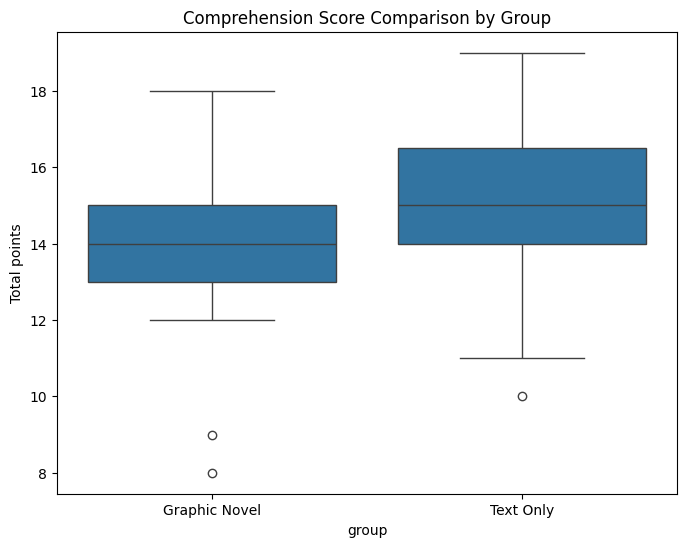

In [1121]:
postest_balanced_gn_copy = postest_balanced_gn.copy()
postest_balanced_to_copy = postest_balanced_to.copy()
postest_balanced_gn_copy['group'] = 'Graphic Novel'
postest_balanced_to_copy['group'] = 'Text Only'

# Concatenate the DataFrames
df_combined_group = pd.concat([postest_balanced_gn_copy, postest_balanced_to_copy])

# List of columns to plot
columns_to_plot = ['Total points']  # Add more columns as needed

# Loop through the columns and create box plots
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='group', y=column, data=df_combined_group)
    plt.title('Comprehension Score Comparison by Group')
    plt.show()

In [1122]:
'''
#try to remove outliers
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Assuming df is your DataFrame with 'group' and 'score' columns

# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers
gn_no_outliers = remove_outliers_iqr(postest_balanced_gn, 'Total points')
to_no_outliers = remove_outliers_iqr(postest_balanced_to, 'Total points')

# Add 'group' column to each DataFrame
gn_no_outliers['group'] = 'Graphic Novel'
to_no_outliers['group'] = 'Text Only'

print(gn_no_outliers.shape)
print(to_no_outliers.shape)

# Concatenate the DataFrames
df_combined_no_out = pd.concat([gn_no_outliers, to_no_outliers])

# Boxplot after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='group', y='Total points', data=df_combined_no_out)
plt.title('Comprehension Score Comparison by Group (Outliers Removed)')
plt.xlabel('Group')
plt.ylabel('Total Points')
plt.show()


print("\n OUTLIERS REMOVED")
different_columns = checkSignificance( pd.DataFrame(gn_no_outliers['Total points']), pd.DataFrame(to_no_outliers['Total points']))
print(different_columns)
'''

'\n#try to remove outliers\nimport pandas as pd\nimport numpy as np\nimport seaborn as sns\nimport matplotlib.pyplot as plt\nfrom scipy.stats import mannwhitneyu\n\n# Assuming df is your DataFrame with \'group\' and \'score\' columns\n\n# Function to remove outliers using IQR\ndef remove_outliers_iqr(df, column):\n    Q1 = df[column].quantile(0.25)\n    Q3 = df[column].quantile(0.75)\n    IQR = Q3 - Q1\n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]\n\n# Remove outliers\ngn_no_outliers = remove_outliers_iqr(postest_balanced_gn, \'Total points\')\nto_no_outliers = remove_outliers_iqr(postest_balanced_to, \'Total points\')\n\n# Add \'group\' column to each DataFrame\ngn_no_outliers[\'group\'] = \'Graphic Novel\'\nto_no_outliers[\'group\'] = \'Text Only\'\n\nprint(gn_no_outliers.shape)\nprint(to_no_outliers.shape)\n\n# Concatenate the DataFrames\ndf_combined_no_out = pd.concat([gn_no_outliers, to

NARRATIVE ENGAGEMENT (NEM)

In [1123]:
engagement_column_names = ["understanding1_reverse","understanding2_reverse","understanding3_reverse","focus1_reverse","focus2_reverse","focus3_reverse", "presence1", "presence2","presence3", "engagement1", "engagement2","engagement3"]


def encodeNarrativeEngagement(df):
    df_copy = df.copy()
    #isolate columns related to comprehension
    df_engagement = df_copy.iloc[:, 1:14]
    #remove attention check column
    df_engagement = df_engagement.drop(columns=df_engagement.filter(like='Mark').columns)
    original_columns = df_engagement.columns.to_list()
    df_engagement.columns = engagement_column_names

    #encode answers (applying reverse coding when needed)   
    for column in df_engagement.columns:
        #reverse coding
        if 'reverse' in column.lower():
            df_engagement.loc[:, column] = df_engagement[column].replace(likert_reverse_coding)
        #normal coding
        else:
            df_engagement.loc[:, column] = df_engagement[column].replace(likert_coding)
        
    return df_engagement, original_columns

In [1124]:
'''
#all
gn_engagement, original_col = encodeNarrativeEngagement(postest_graphicnovel)
print(gn_engagement.shape)#12 because 4 subscales with 3 items each
to_engagement, original_col = encodeNarrativeEngagement(postest_textonly)
print(to_engagement.shape)#12 because 4 subscales with 3 items each
'''
#balanced
gn_engagement_balanced, original_col = encodeNarrativeEngagement(postest_balanced_gn)
print(gn_engagement_balanced.shape)#12 because 4 subscales with 3 items each
to_engagement_balanced, original_col = encodeNarrativeEngagement(postest_balanced_to)
print(to_engagement_balanced.shape)#12 because 4 subscales with 3 items each

(37, 12)
(39, 12)


PLOT DATA AFTER REVERSE CODING
- positive on the right
- negative on the  left

In [1125]:
#Transform the data for plotting
def prepare_data_for_plotting(df):
    df_melted = df.melt(var_name='Question', value_name='Response')
    response_counts = df_melted.groupby(['Question', 'Response']).size().unstack().fillna(0)
    response_counts = response_counts.apply(lambda x: x / x.sum(), axis=1)  # Normalize to get percentages
    # Define the correct order of questions
    original_col = df.columns.tolist()  # Assuming this is the correct order of questions
    # Reindex response_counts to match the original order of questions
    response_counts = response_counts.reindex(original_col[::-1])
    return response_counts
#call function on df

# Plot the Data
def plot_likert_stacked(response_counts, fig_size):
    # Define the color palette with custom colors
    colors = ['#d73027', '#fc8d59', '#d9d9d9', '#91bfdb', '#4575b4']
    response_labels = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']
    
    if fig_size == "nem":
        fig, ax = plt.subplots(figsize=(10, 5))
    elif fig_size == "enjoyment":
        fig, ax = plt.subplots(figsize=(10, 2))
    elif fig_size == "ai":
        fig, ax = plt.subplots(figsize=(6, 3))
    elif fig_size == "text_image":
        fig, ax = plt.subplots(figsize=(8, 4))
    

    # Plot each response category
    bottom = None
    for i, response in enumerate(response_counts.columns):
        if bottom is None:
            ax.barh(response_counts.index, response_counts[response], color=colors[i], label=response_labels[i])
            bottom = response_counts[response]
        else:
            ax.barh(response_counts.index, response_counts[response], left=bottom, color=colors[i], label=response_labels[i])
            bottom += response_counts[response]
    
    
    # Customize y-axis with custom question labels
    #ax.set_yticks(range(len(question_labels)))
    #ax.set_yticklabels(question_labels[::-1])
    
    # Add legend and labels
    ax.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_xlabel('Percentage')
    ax.set_title('Likert Scale Responses')
    
    plt.tight_layout()
    plt.show()




 BALANCED


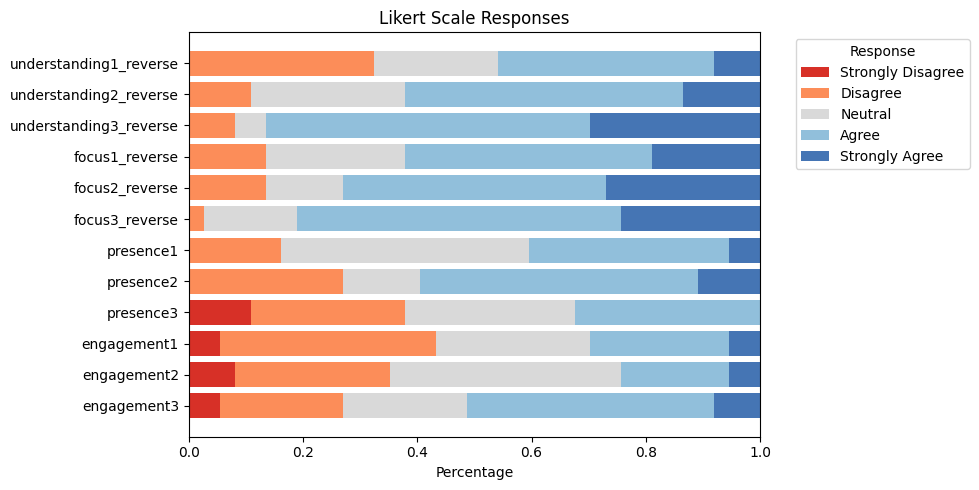

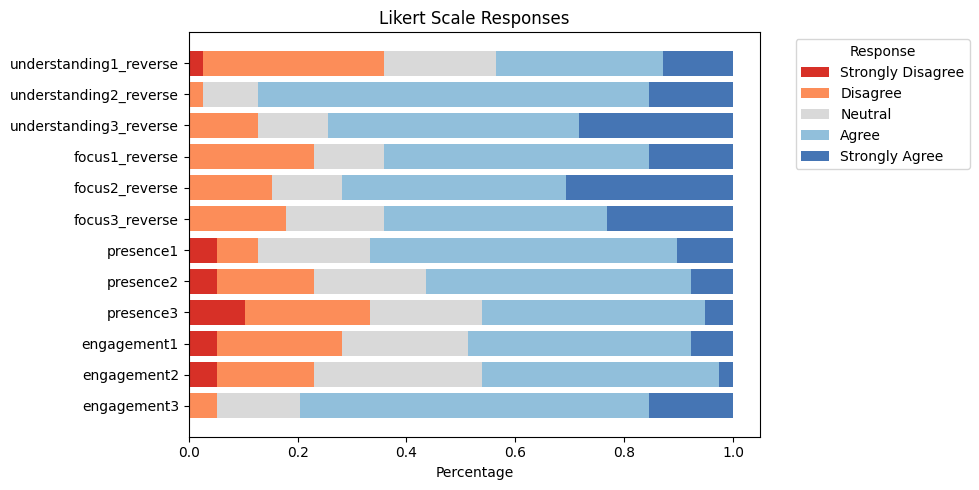

In [1126]:
#all
'''
print("ALL")
prepared_gn = prepare_data_for_plotting(gn_engagement)
prepared_to = prepare_data_for_plotting(to_engagement)

question_labels = original_col
plot_likert_stacked(prepared_gn, "nem")
plot_likert_stacked(prepared_to, "nem")
'''
print("\n BALANCED")
#balanced
prepared_gn_balanced = prepare_data_for_plotting(gn_engagement_balanced)
prepared_to_balanced = prepare_data_for_plotting(to_engagement_balanced)

question_labels = original_col
plot_likert_stacked(prepared_gn_balanced, "nem")
plot_likert_stacked(prepared_to_balanced, "nem")


PLOT ITEM BY ITEM COMPARISON WITHOUT REVERSE CODING

In [1127]:
#take away reverse coding before running this!
'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Add 'group' column to each DataFrame
gn_engagement_balanced_copy = gn_engagement_balanced.copy()
to_engagement_balanced_copy = to_engagement_balanced.copy()
gn_engagement_balanced_copy['group'] = 'Graphic Novel'
to_engagement_balanced_copy['group'] = 'Text Only'

combined_likert = pd.concat([gn_engagement_balanced_copy, to_engagement_balanced_copy])

# Get the original seaborn color palette
sns_palette = sns.color_palette()

# Define a consistent color palette using the original seaborn colors
palette = {'Graphic Novel': sns_palette[0], 'Text Only': sns_palette[1]}

for column, col in zip(gn_engagement_balanced[:-1], original_col):
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=column, hue='group', data=combined_likert, palette=palette)
    plt.title(f'{col}')
    plt.xlabel('Rating')
    plt.ylabel('Count')

    # Customizing x-axis labels
    labels = {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
    ax.set_xticklabels([labels[int(label.get_text())] for label in ax.get_xticklabels()])

    plt.xticks(rotation=45)
    plt.show()
'''


"\nimport pandas as pd\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Add 'group' column to each DataFrame\ngn_engagement_balanced_copy = gn_engagement_balanced.copy()\nto_engagement_balanced_copy = to_engagement_balanced.copy()\ngn_engagement_balanced_copy['group'] = 'Graphic Novel'\nto_engagement_balanced_copy['group'] = 'Text Only'\n\ncombined_likert = pd.concat([gn_engagement_balanced_copy, to_engagement_balanced_copy])\n\n# Get the original seaborn color palette\nsns_palette = sns.color_palette()\n\n# Define a consistent color palette using the original seaborn colors\npalette = {'Graphic Novel': sns_palette[0], 'Text Only': sns_palette[1]}\n\nfor column, col in zip(gn_engagement_balanced[:-1], original_col):\n    plt.figure(figsize=(10, 6))\n    ax = sns.countplot(x=column, hue='group', data=combined_likert, palette=palette)\n    plt.title(f'{col}')\n    plt.xlabel('Rating')\n    plt.ylabel('Count')\n\n    # Customizing x-axis labels\n    labels = {1: 'Strongly Disa

COMPARE NEM ITEM BY ITEM 

In [1128]:
#balanced
print("\n BALANCED")
different_columns = checkSignificance( gn_engagement_balanced, to_engagement_balanced)
print(different_columns)


 BALANCED
understanding1_reverse
Levene's: 0.40786537326378336 0.5250266881753094
T-test: 0.15020220158428624 0.8810137439047797
Mann-Whitney U test: 735.5 0.8833324228065373


understanding2_reverse
Levene's: 5.126456361809696 0.026493915182498898
You cannot run ANOVA/t-test for understanding2_reverse (Levene's p-value:  0.026493915182498898 )
Mann-Whitney U test: 554.0 0.047781495714944444
Significant difference in  understanding2_reverse (MANN WHITNEY)
Both groups have similar medians in understanding2_reverse (Median: 4.0 vs 4.0)
Graphic novel group IQR: 1.0, Text only group IQR: 0.0


understanding3_reverse
Levene's: 0.9718734269254431 0.32742582517520535
T-test: 0.8861265060397052 0.3784200060963674
Mann-Whitney U test: 790.0 0.4403547243842192


focus1_reverse
Levene's: 0.054414891100085114 0.8161958160905247
T-test: 0.49391100475798105 0.6228319260677132
Mann-Whitney U test: 754.0 0.7237094252043202


focus2_reverse
Levene's: 0.17260896260142403 0.679005721350251
T-test: -0.03

ITEM BY ITEM PLOT

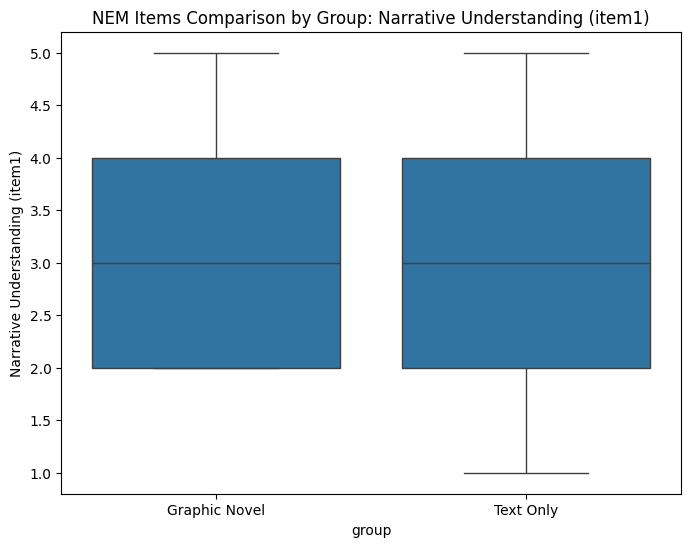

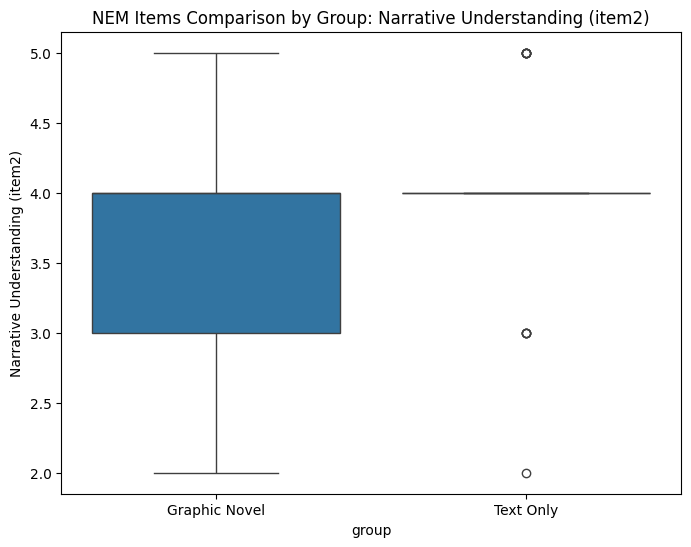

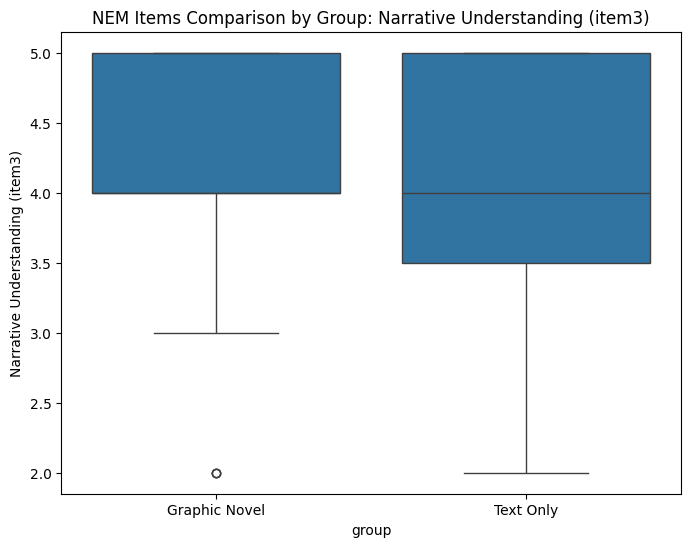

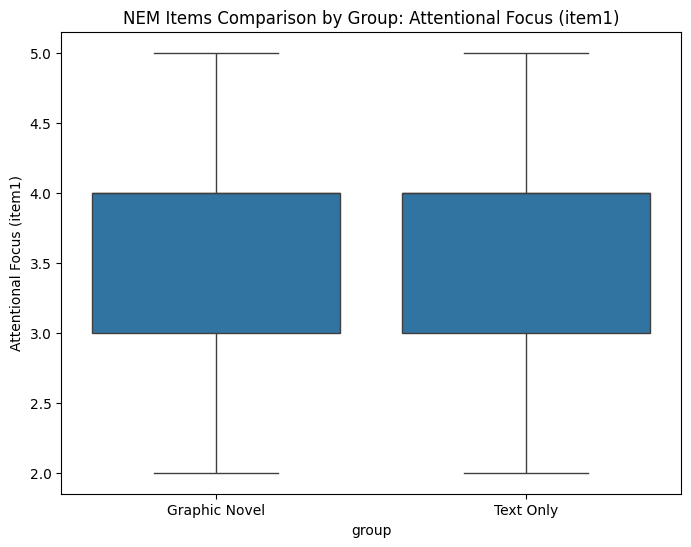

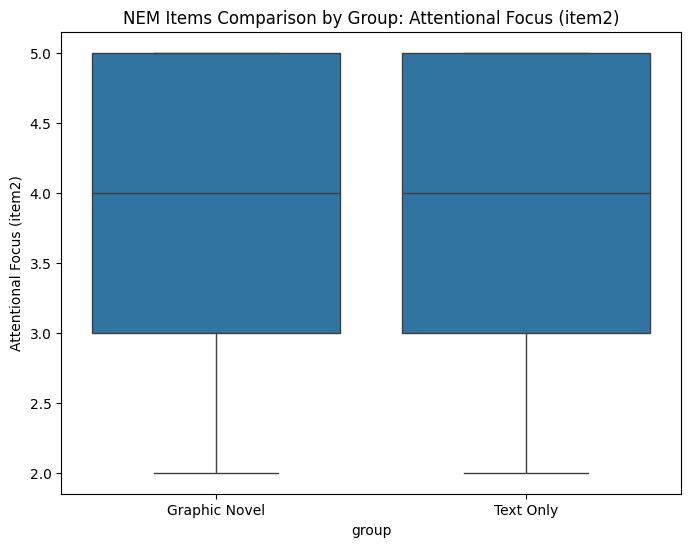

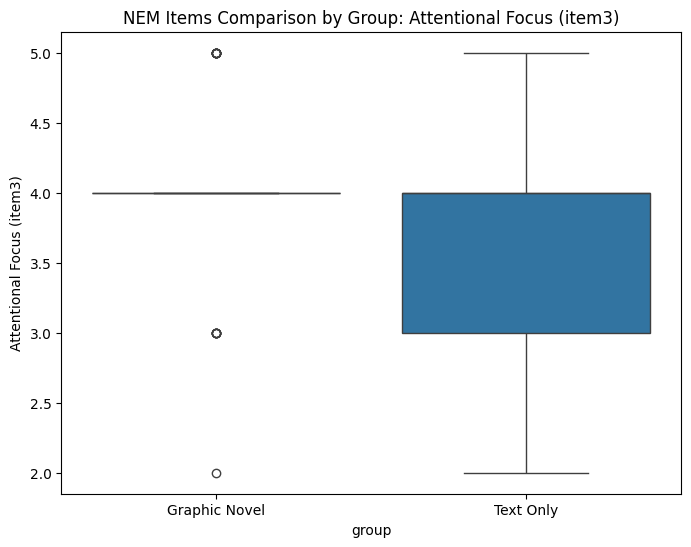

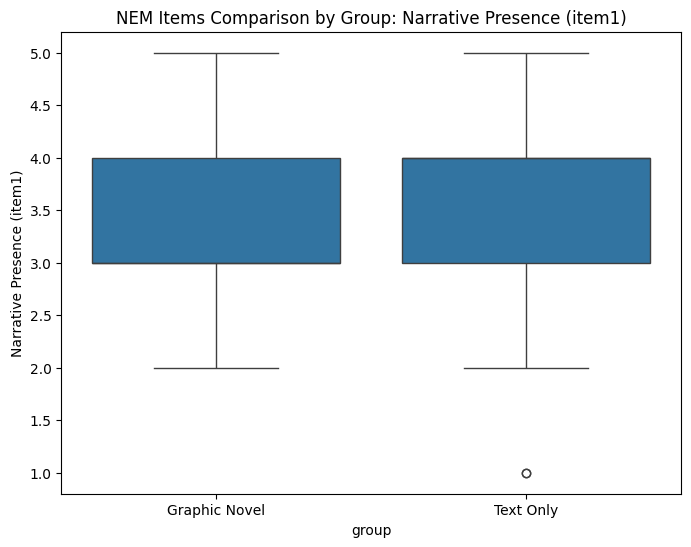

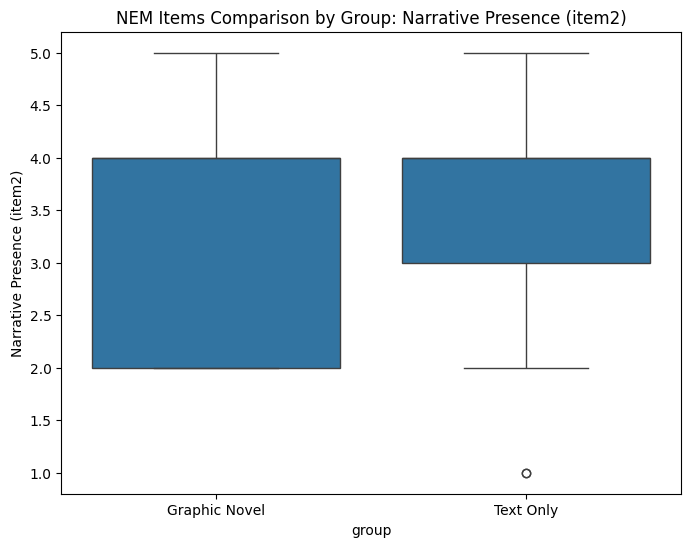

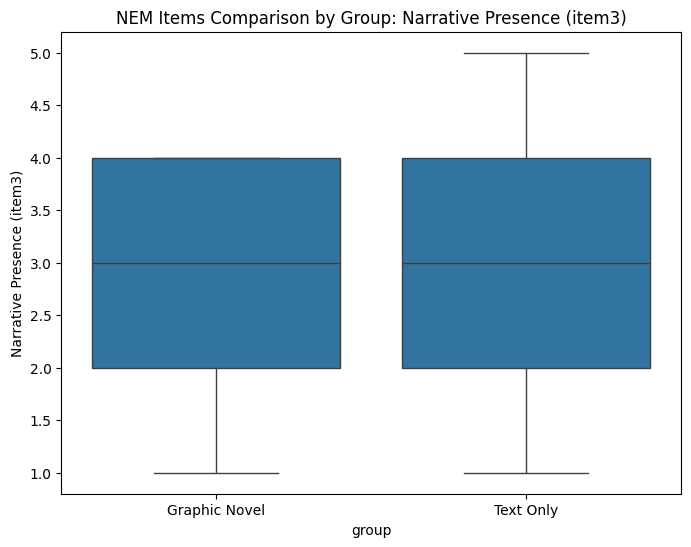

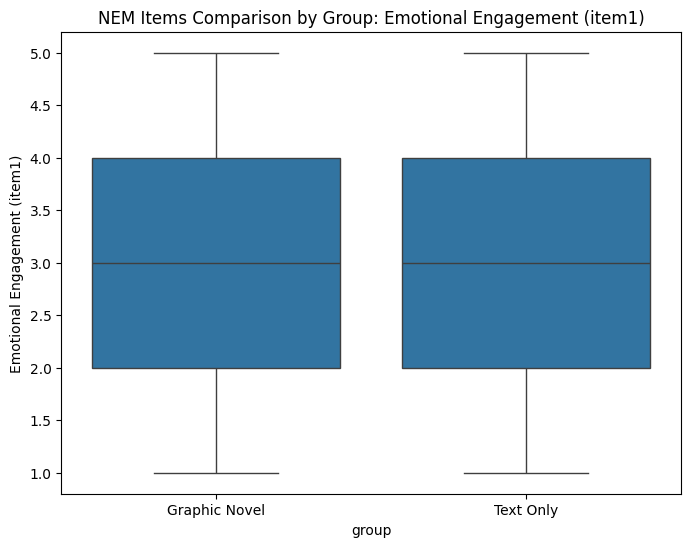

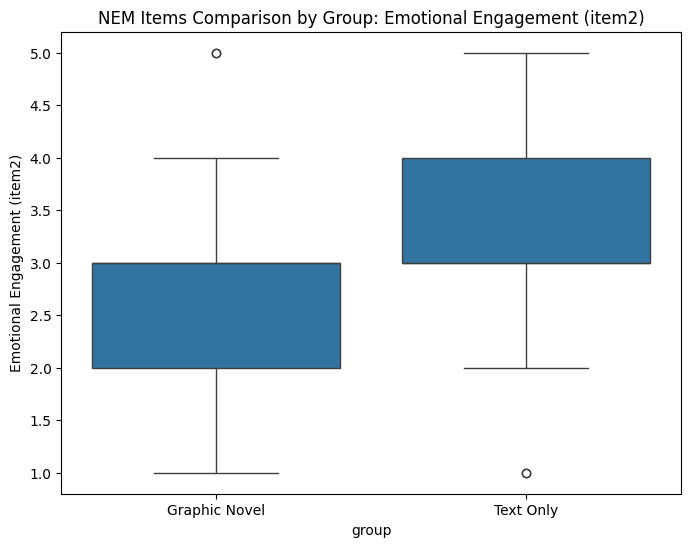

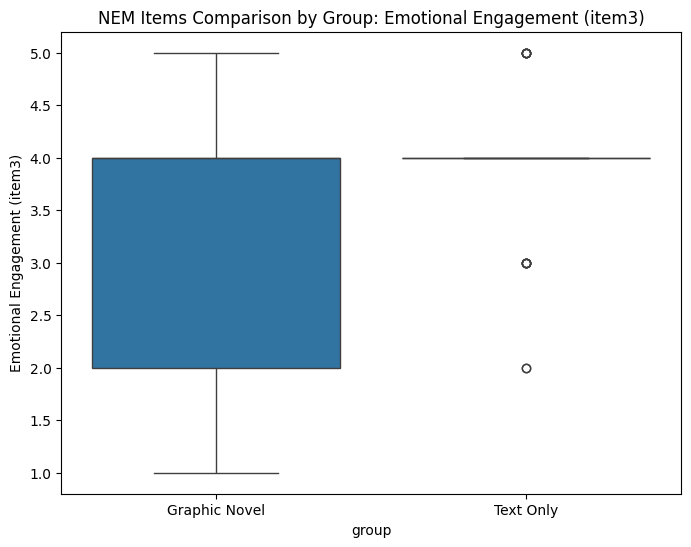

In [1129]:
gn_engagement_balanced_copy = gn_engagement_balanced.copy()
to_engagement_balanced_copy  =to_engagement_balanced.copy()
gn_engagement_balanced_copy['group'] = 'Graphic Novel'
to_engagement_balanced_copy['group'] = 'Text Only'

# Concatenate the DataFrames
df_combined_items = pd.concat([gn_engagement_balanced_copy, to_engagement_balanced_copy])
# List of columns to plot
#columns_to_plot = ['overall1', 'overall2', 'overall3', 'overall4']  # Add more columns as needed
column_names = ['Narrative Understanding (item1)','Narrative Understanding (item2)','Narrative Understanding (item3)', 'Attentional Focus (item1)', 'Attentional Focus (item2)', 'Attentional Focus (item3)', 'Narrative Presence (item1)', 'Narrative Presence (item2)','Narrative Presence (item3)','Emotional Engagement (item1)', 'Emotional Engagement (item2)', 'Emotional Engagement (item3)', 'group']
df_combined_items.columns = column_names
# Loop through the columns and create box plots
for column in df_combined_items.iloc[:, :-1]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='group', y=column, data=df_combined_items)
    plt.title(f'NEM Items Comparison by Group: {column}')
    plt.show()

In [1130]:
def scoreNarrativeEngagement(df_engagement): 
    subscales=[]
    #separate subscales
    understanding = df_engagement.filter(like='understanding')
    focus = df_engagement.filter(like='focus')
    presence = df_engagement.filter(like='presence')
    engagement = df_engagement.filter(like='engagement')

    #average scores within each subscale
    #avg understanding
    understanding['overall1'] = understanding.mean(axis=1)
    #avg focus
    focus['overall2'] = focus.mean(axis=1)
    #avg presence
    presence['overall3'] = presence.mean(axis=1)
    #avg engagement
    engagement['overall4'] = engagement.mean(axis=1)
    #append all subscales to list
    subscales.append(understanding['overall1'])
    subscales.append(focus['overall2'])
    subscales.append(presence['overall3'])
    subscales.append(engagement['overall4'])

    #avg narrativ engagement overall (avg of the 4 subscales)
    nem = pd.concat([ understanding['overall1'], focus['overall2'], presence['overall3'], engagement['overall4']], axis=1)
    nem['overall_nem'] = nem.mean(axis=1)
    #append
    subscales.append(nem['overall_nem'])

    return subscales

In [1131]:
#all
'''
subscales_gn = scoreNarrativeEngagement(gn_engagement)
subscales_to = scoreNarrativeEngagement(to_engagement)
'''
#balanced
subscales_gn_balanced = scoreNarrativeEngagement(gn_engagement_balanced)
subscales_to_balanced = scoreNarrativeEngagement(to_engagement_balanced)

In [1132]:
subscales_gn_balanced_df = pd.DataFrame(subscales_gn_balanced).transpose()
# Calculate basic descriptive statistics
subscales_gn_balanced_df.describe()



,overall1,overall2,overall3,overall4,overall_nem
count,37.000000,37.000000,37.000000,37.000000,37.000000
mean,3.648649,3.855856,3.189189,3.000000,3.423423
std,0.797163,0.787795,0.763926,0.871355,0.544111
min,2.000000,2.333333,1.666667,1.000000,2.250000
25%,3.333333,3.666667,3.000000,2.666667,3.083333
50%,3.666667,4.000000,3.333333,3.000000,3.416667
75%,4.000000,4.333333,3.666667,3.666667,3.666667
max,5.000000,5.000000,4.333333,4.333333,4.583333


In [1133]:
subscales_to_balanced_df = pd.DataFrame(subscales_to_balanced).transpose()
# Calculate basic descriptive statistics
subscales_to_balanced_df.describe()



,overall1,overall2,overall3,overall4,overall_nem
count,39.000000,39.000000,39.000000,39.000000,39.000000
mean,3.692308,3.709402,3.341880,3.444444,3.547009
std,0.773783,0.908631,0.906401,0.742736,0.585146
min,2.000000,2.000000,1.000000,2.000000,2.166667
25%,3.166667,3.000000,3.000000,3.000000,3.208333
50%,3.666667,4.000000,3.666667,3.666667,3.583333
75%,4.166667,4.166667,3.833333,4.000000,3.916667
max,5.000000,5.000000,5.000000,4.666667,4.750000


In [1134]:
#balanced
for subscale_gn_b, subscale_to_b in zip(subscales_gn_balanced, subscales_to_balanced):
    significant = checkSignificance(pd.DataFrame(subscale_gn_b), pd.DataFrame(subscale_to_b))
   

overall1
Levene's: 0.07199415684834089 0.7892016824336172
T-test: -0.24226791812247017 0.8092427499868003
Mann-Whitney U test: 708.5 0.895498333192127


overall2
Levene's: 0.6211607864841916 0.43313373117168186
T-test: 0.7490207353096682 0.45621907170109
Mann-Whitney U test: 789.0 0.4795277909292036


overall3
Levene's: 0.26403059510847754 0.6088954849063013
T-test: -0.7919592141868701 0.4309158797364834
Mann-Whitney U test: 615.5 0.2657899099086466


overall4
Levene's: 0.5543775954589021 0.4588925484058335
T-test: -2.397191877788357 0.019045998243849782
Significant difference in  overall4 (T-TEST)
Text only group has higher values in overall4 (Mean: 3.4444444444444438 vs 2.999999999999999)
Mann-Whitney U test: 507.5 0.025196138606534777
Significant difference in  overall4 (MANN WHITNEY)
Text only group has higher values in overall4 (Median: 3.6666666666666665 vs 3.0)


overall_nem
Levene's: 0.1784172266939974 0.6739617826770717
T-test: -0.9521772518335305 0.34410691812841665
Mann-Whit

PLOT OVERALL COMPARISON PER SUBSCALE

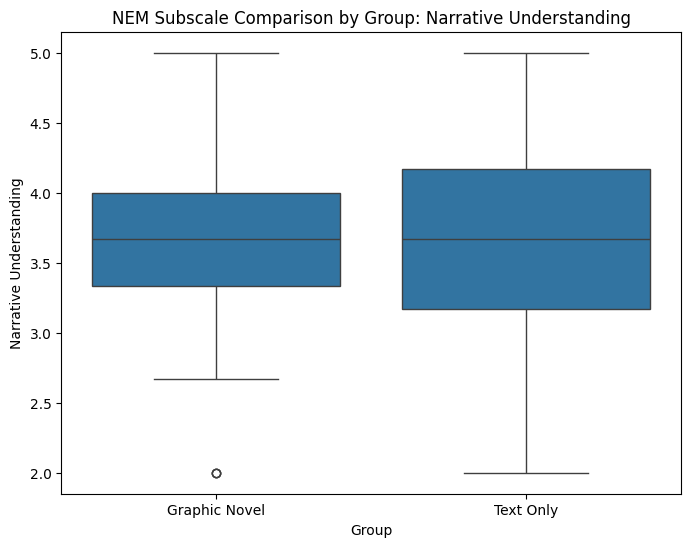

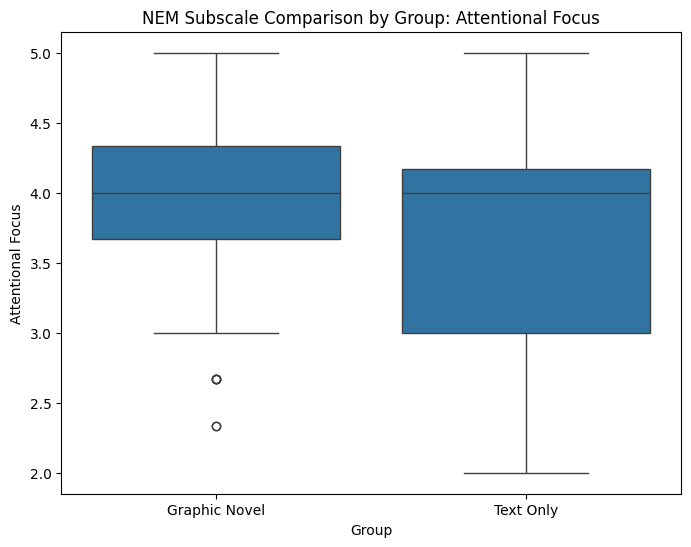

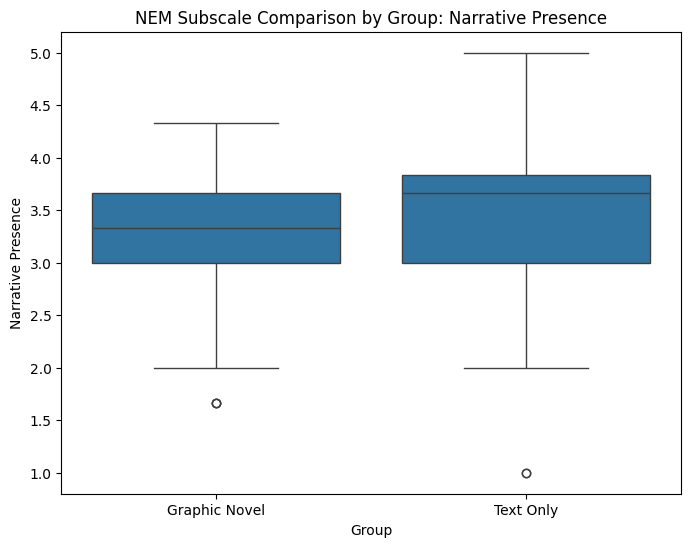

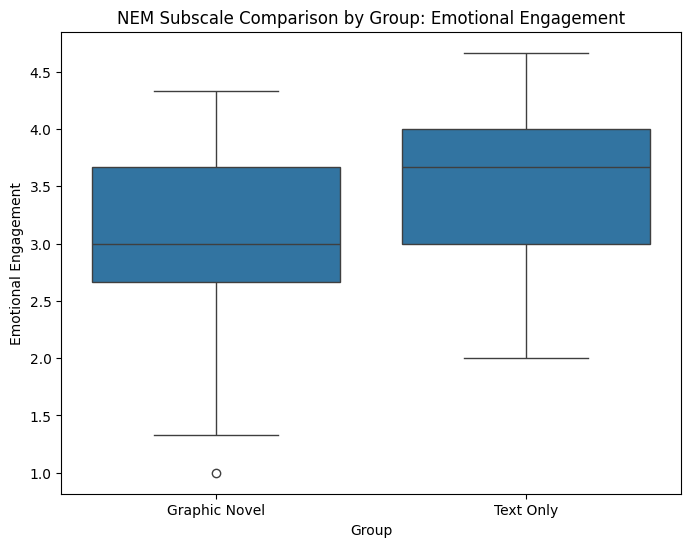

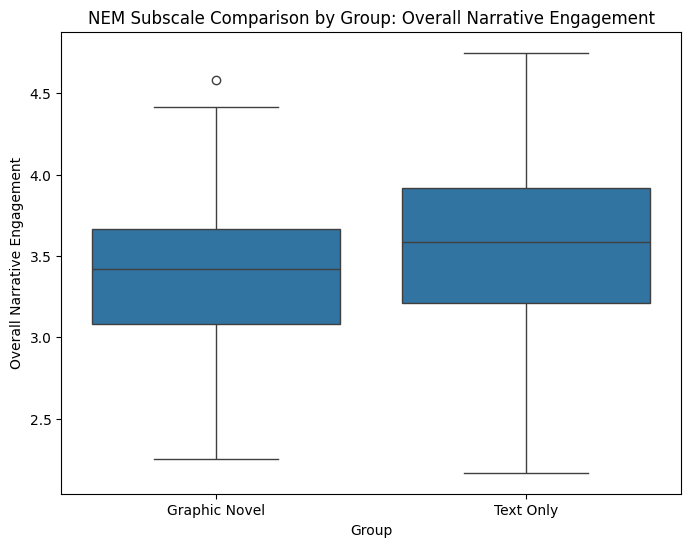

In [1135]:
subscales_gn_balanced_copy = pd.DataFrame(subscales_gn_balanced.copy()).transpose()
subscales_to_balanced_copy  = pd.DataFrame(subscales_to_balanced.copy()).transpose()
subscales_gn_balanced_copy['group'] = 'Graphic Novel'
subscales_to_balanced_copy['group'] = 'Text Only'

# Concatenate the DataFrames
df_combined_scales = pd.concat([subscales_gn_balanced_copy, subscales_to_balanced_copy])
# List of columns to plot
#columns_to_plot = ['overall1', 'overall2', 'overall3', 'overall4']  # Add more columns as needed
column_names = ['Narrative Understanding', 'Attentional Focus', 'Narrative Presence', 'Emotional Engagement', 'Overall Narrative Engagement', 'Group']
df_combined_scales.columns = column_names
# Loop through the columns and create box plots
for column in df_combined_scales.iloc[:, :-1]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Group', y=column, data=df_combined_scales)
    plt.title(f'NEM Subscale Comparison by Group: {column}')
    plt.show()

In [1136]:
#put back original column names
'''
#ALL
gn_engagement.columns = original_col
to_engagement.columns = original_col
'''
#BALANCED
gn_engagement_balanced.columns = original_col
to_engagement_balanced.columns = original_col

TEXT AND IMAGES (CLEANED)


 BALANCED
Index(['I liked the style and quality of the illustrations',
       'The distribution and division of the text into scenes was well done.',
       'The images accompanying each scene of the graphic novel appropriately illustrated the scene's essence',
       'Overall, text and images accompanied each other well'],
      dtype='object')


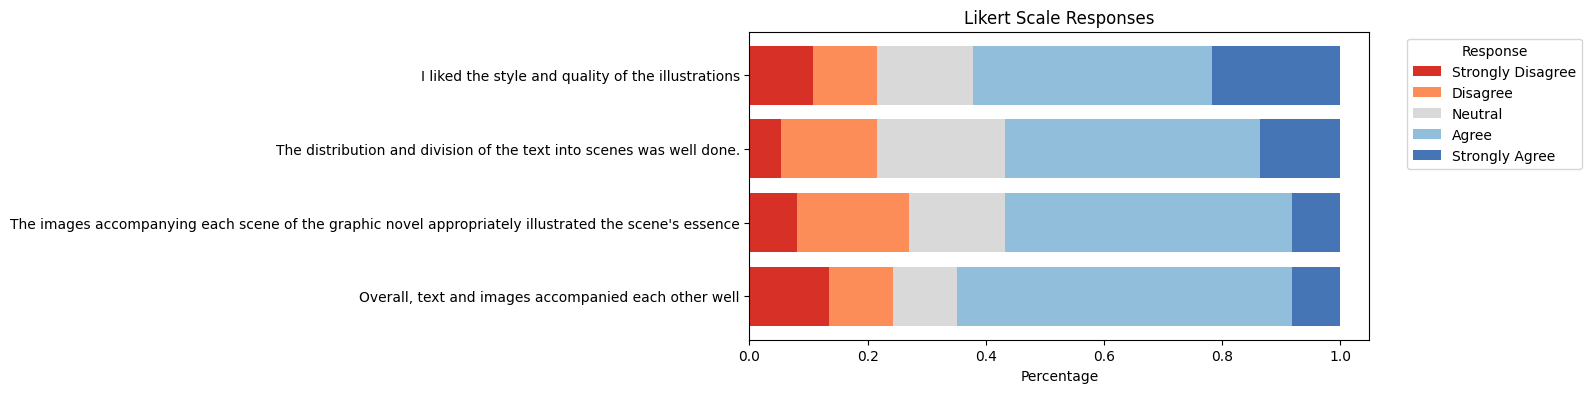

In [1137]:
'''
#ALL
print("ALL")
df_copy = postest_graphicnovel.copy()
#isolate columns related to text/images
df_text_images = df_copy.iloc[:,14:18]
#encode answers (no reverse coding needed)
print(df_text_images.columns)
for column in df_text_images.columns:
    df_text_images.loc[:, column] = df_text_images[column].replace(likert_coding)


question_labels = df_text_images.columns
prepared = prepare_data_for_plotting(df_text_images)
plot_likert_stacked(prepared, "text_image")
'''

#BALANCED
print("\n BALANCED")
df_copy_b = postest_balanced_gn.copy()
#isolate columns related to text/images
df_text_images_b = df_copy_b.iloc[:,14:18]
#encode answers (no reverse coding needed)
print(df_text_images_b.columns)
for column in df_text_images_b.columns:
    df_text_images_b.loc[:, column] = df_text_images_b[column].replace(likert_coding)


question_labels_b = df_text_images_b.columns
prepared_b = prepare_data_for_plotting(df_text_images_b)
plot_likert_stacked(prepared_b, "text_image")


CHI SQUARED

                                                                                               Statement  \
0                                                     I liked the style and quality of the illustrations   
1                                   The distribution and division of the text into scenes was well done.   
2  The images accompanying each scene of the graphic novel appropriately illustrated the scene's essence   
3                                                   Overall, text and images accompanied each other well   

   Chi-Square Statistic  Degrees of Freedom   p-value  
0             11.243243                   4  0.023962  
1             15.027027                   4  0.004645  
2             20.702703                   4  0.000363  
3             31.513514                   4  0.000002  


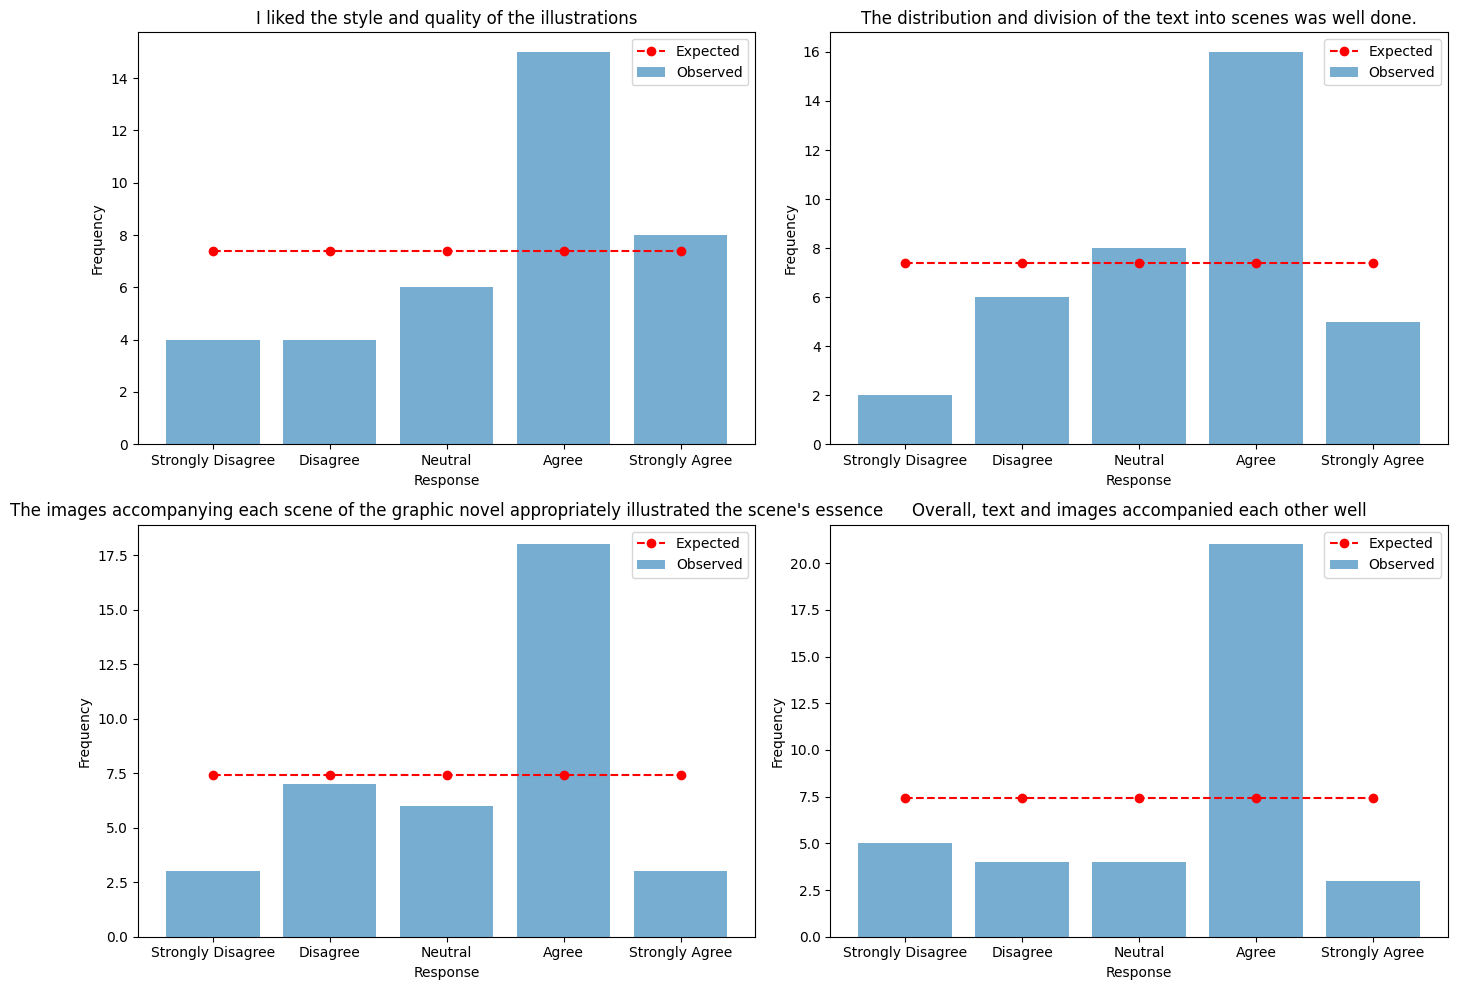

In [1138]:
import pandas as pd
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt

chi_square_results = []

for statement in df_text_images_b.columns:
    # Calculate observed frequencies
    observed_frequencies = df_text_images_b[statement].value_counts().reindex(range(1, 6), fill_value=0).sort_index()
    total_responses = observed_frequencies.sum()
    expected_frequencies = np.array([total_responses / 5] * 5)
    
    # Calculate chi-square statistic
    chi_square_stat = ((observed_frequencies - expected_frequencies) ** 2 / expected_frequencies).sum()
    
    # Degrees of freedom
    df_ = len(observed_frequencies) - 1
    
    # p-value
    p_value = chi2.sf(chi_square_stat, df_)
    
    chi_square_results.append((statement, chi_square_stat, df_, p_value))

# Convert results to DataFrame for easy viewing
chi_square_df = pd.DataFrame(chi_square_results, columns=["Statement", "Chi-Square Statistic", "Degrees of Freedom", "p-value"])
print(chi_square_df)

# Plotting observed vs. expected frequencies
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

for ax, (statement, observed) in zip(axes, df_text_images_b.items()):
    # Calculate observed frequencies
    observed_frequencies = observed.value_counts().reindex(range(1, 6), fill_value=0).sort_index()
    total_responses = observed_frequencies.sum()
    expected_frequencies = np.array([total_responses / 5] * 5)
    
    categories = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']
    ax.bar(categories, observed_frequencies, alpha=0.6, label='Observed')
    ax.plot(categories, expected_frequencies, color='red', marker='o', linestyle='dashed', label='Expected')
    ax.set_title(statement)
    ax.set_xlabel('Response')
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()


OVERALL ENJOYMENT (CLEANED)


 BALANCED
Index(['If this story was part of a series, I would continue reading it.', 'Overall, I enjoyed reading the graphic novel'], dtype='object')


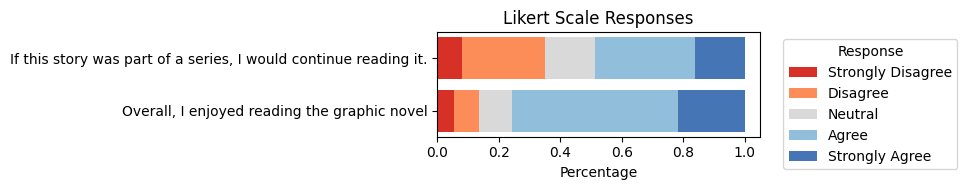

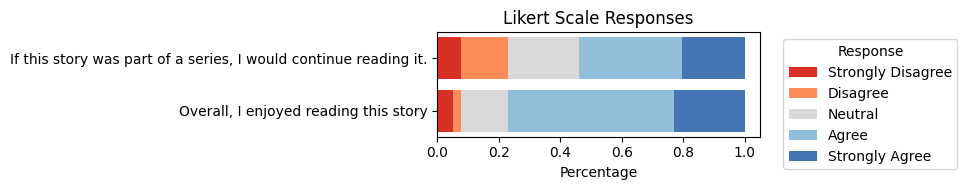

In [1139]:
'''
print("ALL")
#GRAPHIC NOVEL
#isolate columns related to text/images
df_enjoyment_gn = postest_graphicnovel.iloc[:,18:20]
print(df_enjoyment_gn.columns)
#encode answers (no reverse coding needed)
for column in df_enjoyment_gn.columns:
    df_enjoyment_gn.loc[:, column] = df_enjoyment_gn[column].replace(likert_coding)

#TEXT ONLY
#isolate columns related to text/images
df_enjoyment_to = postest_textonly.iloc[:, 14:16]
#encode answers (no reverse coding needed)
for column in df_enjoyment_to.columns:
    df_enjoyment_to.loc[:, column] = df_enjoyment_to[column].replace(likert_coding)

question_labels = df_enjoyment_to.columns
prepared_enj_gn = prepare_data_for_plotting(df_enjoyment_gn)
plot_likert_stacked(prepared_enj_gn , "enjoyment")
prepared_enj_to = prepare_data_for_plotting(df_enjoyment_to)
plot_likert_stacked(prepared_enj_to,  "enjoyment")
'''
print("\n BALANCED")
#GRAPHIC NOVEL
#isolate columns related to text/images
df_enjoyment_gn_balanced = postest_balanced_gn.iloc[:,18:20]
print(df_enjoyment_gn_balanced.columns)
#encode answers (no reverse coding needed)
for column in df_enjoyment_gn_balanced.columns:
    df_enjoyment_gn_balanced.loc[:, column] = df_enjoyment_gn_balanced[column].replace(likert_coding)

#TEXT ONLY
#isolate columns related to text/images
df_enjoyment_to_balanced = postest_balanced_to.iloc[:, 14:16]
#encode answers (no reverse coding needed)
for column in df_enjoyment_to_balanced.columns:
    df_enjoyment_to_balanced.loc[:, column] = df_enjoyment_to_balanced[column].replace(likert_coding)

question_labels = df_enjoyment_to_balanced.columns
prepared_enj_gn_b = prepare_data_for_plotting(df_enjoyment_gn_balanced)
plot_likert_stacked(prepared_enj_gn_b , "enjoyment")
prepared_enj_to_b = prepare_data_for_plotting(df_enjoyment_to_balanced)
plot_likert_stacked(prepared_enj_to_b,  "enjoyment")


In [1140]:
df_enjoyment_gn_balanced.columns = df_enjoyment_to_balanced.columns

checkSignificance(df_enjoyment_gn_balanced,df_enjoyment_to_balanced)

If this story was part of a series, I would continue reading it.
Levene's: 0.34993021271165536 0.555955495209002
T-test: -0.7785701086449923 0.4387155152142058
Mann-Whitney U test: 649.5 0.44363516394435176


Overall, I enjoyed reading this story
Levene's: 0.09776081741318282 0.755412910025858
T-test: -0.3768619985088464 0.7073546913442332
Mann-Whitney U test: 699.5 0.8061905840497846




[]

PLOT ITEM BY ITEM COMPARISON ENJOYMENT

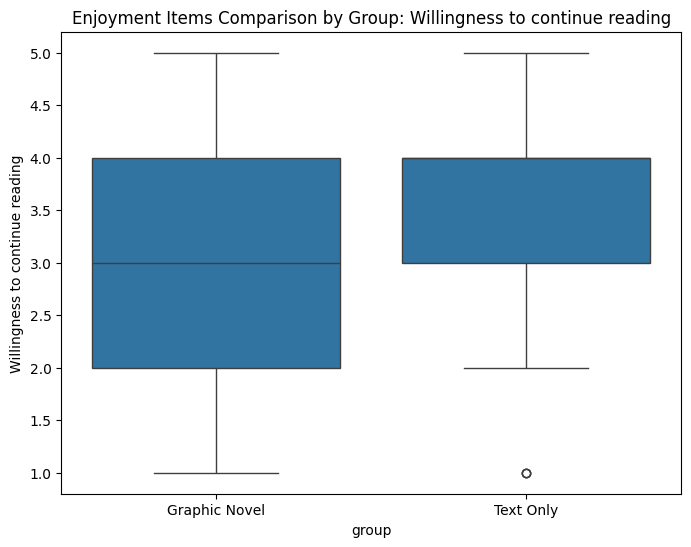

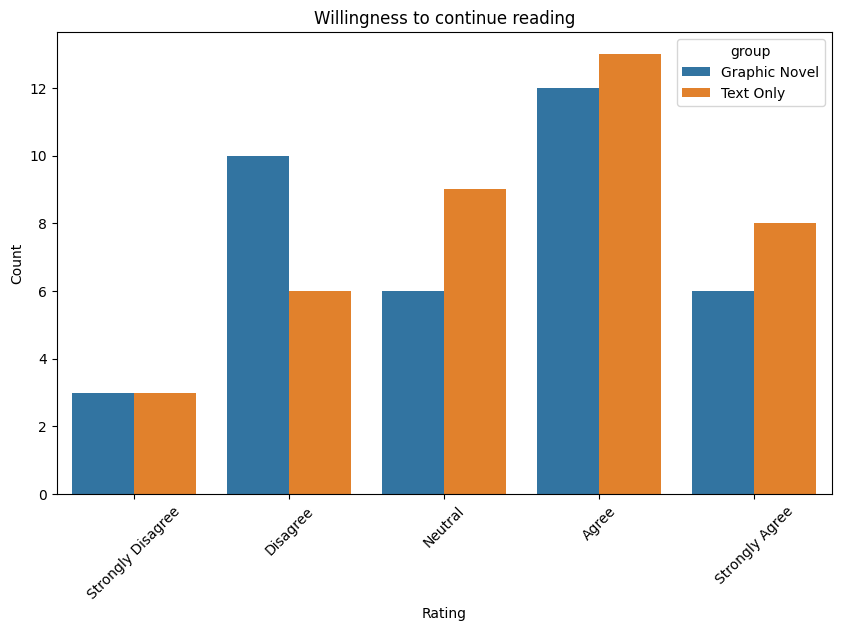

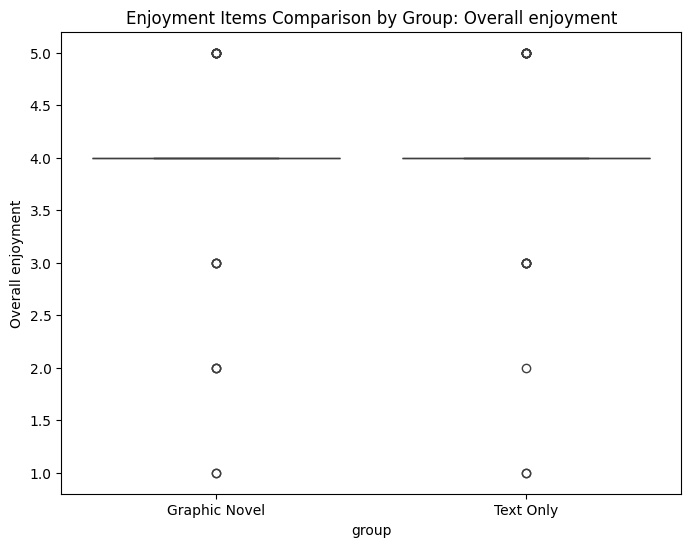

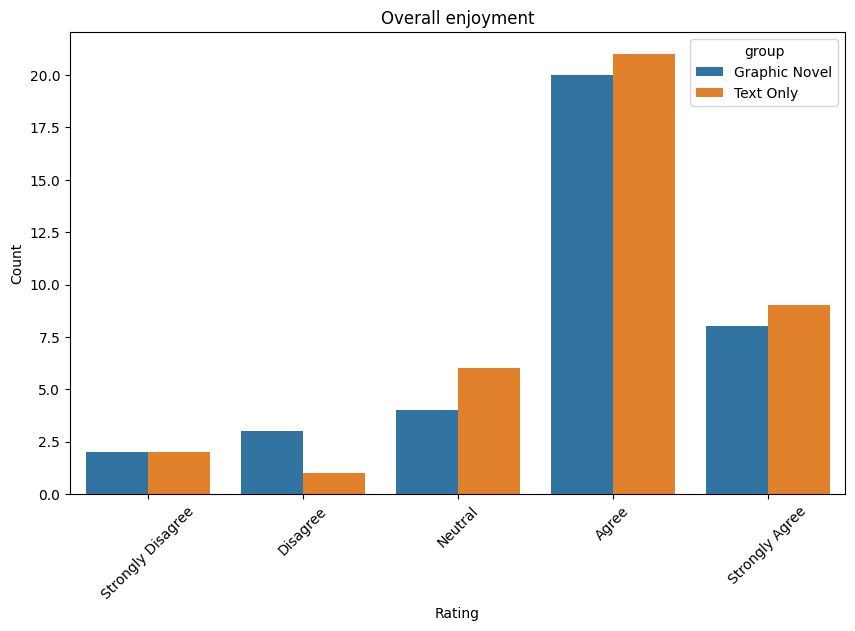

In [1141]:
# Add 'group' column to each DataFrame

gn_enjoyment_balanced_copy = df_enjoyment_gn_balanced.copy()
to_enjoyment_balanced_copy = df_enjoyment_to_balanced.copy()
gn_enjoyment_balanced_copy['group'] = 'Graphic Novel'
to_enjoyment_balanced_copy['group'] = 'Text Only'
gn_enjoyment_balanced_copy.rename(columns={'Overall, I enjoyed reading the graphic novel': 'Overall, I enjoyed reading this story'}, inplace=True)
combined_likert_enj = pd.concat([gn_enjoyment_balanced_copy, to_enjoyment_balanced_copy])
combined_likert_enj.columns = ["Willingness to continue reading", "Overall enjoyment", "group"]
for column in combined_likert_enj:
    if column not in ['group']:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='group', y=column, data=combined_likert_enj)
        plt.title(f'Enjoyment Items Comparison by Group: {column}')
        plt.show()

        #frequency
        plt.figure(figsize=(10, 6))
        ax = sns.countplot(x=column, hue='group', data=combined_likert_enj)
        plt.title(f'{column}')
        plt.xlabel('Rating')
        plt.ylabel('Count')

        # Customizing x-axis labels
        labels = {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
        ax.set_xticklabels([labels[int(label.get_text())] for label in ax.get_xticklabels()])

        plt.xticks(rotation=45)
        plt.show()
    '''
        plt.figure(figsize=(10, 6))
        ax = sns.countplot(x=column, hue='group', data=combined_likert_enj)
        plt.title(f'{column}')
        plt.xlabel('Rating')
        plt.ylabel('Count')

        # Customizing x-axis labels
        labels = {1:'Strongly Disagree', 2:'Disagree',3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
        ax.set_xticklabels([labels[int(label.get_text())] for label in ax.get_xticklabels()])

        plt.xticks(rotation=45)
        plt.show()

'''

In [1175]:
df_enjoyment_gn_balanced.iloc[:, 0].mean()

3.2162162162162162

In [1176]:
df_enjoyment_to_balanced.iloc[:, 0].mean()

3.4358974358974357

In [ ]:
df_enjoyment_gn_balanced.iloc[:, 0].mean()

DID YOU SUSPECT..

In [1142]:
#clean df about "did you suspect..." + why
#all
df_suspect = postest_graphicnovel.iloc[:, 20:22]
#balanced
df_suspect_b = postest_balanced_gn.iloc[:, 20:22]

Did you suspect AI was involved in creating the graphic novel you just read?
Yes    26
No     11
Name: count, dtype: int64


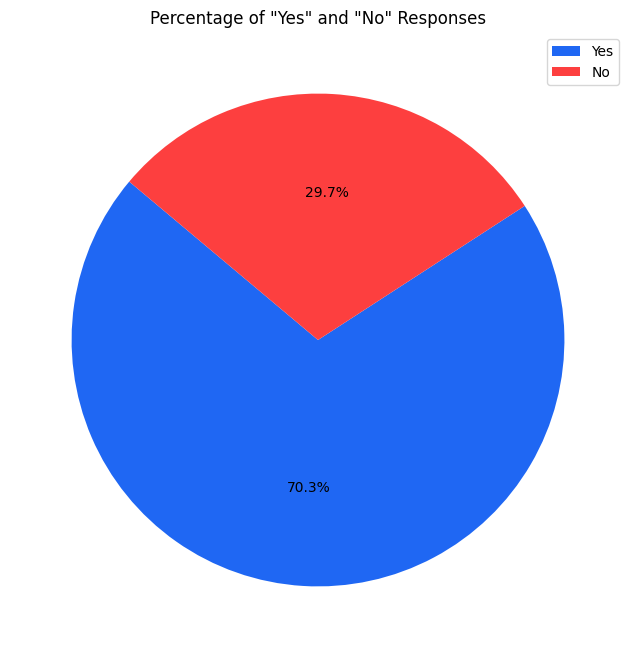

In [1143]:
# Count occurrences of 'Yes' and 'No'
counts = df_suspect_b['Did you suspect AI was involved in creating the graphic novel you just read?'].value_counts()
print(counts)

# Calculate percentages
percentages = counts / counts.sum() * 100

# Create pie chart
plt.figure(figsize=(8, 8))
colors = ['#1f67f3', '#fd3f3f']
plt.pie(percentages, labels=['', ''], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Percentage of "Yes" and "No" Responses')

# Add legend
plt.legend(labels=['Yes', 'No'], loc='upper right')

plt.show()



THEMATIC ANALYSIS

In [1144]:
pip install contractions fuzzywuzzy[speedup]


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vital\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vital\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original: the designs of the characters wer different in every scene
Cleaned: the design of the character wer different in every scene
Themes: ["Images' inconsistencies"]

Original: The images have a AI generated quality to them.
Cleaned: the image have a ai generated quality to them
Themes: ["General AI 'feel'"]

Original: The pictures look like the standard for AI generated content, like being too "glossy" and not being consistent at all with the designs
Cleaned: the picture look like the standard for ai generated content like being too glossy and not being consistent at all with the design
Themes: ["Images' inconsistencies", "General AI 'feel'"]

Original: It wasn't very good and the pace was really strange.
Cleaned: it wa not very good and the pace wa really strange
Themes: ['General negative impressions']

Original: General looks, level od detail od varius parts od IT incosistent with graphic novels i have ecountered previously
Cleaned: general look level od detail od varius part 

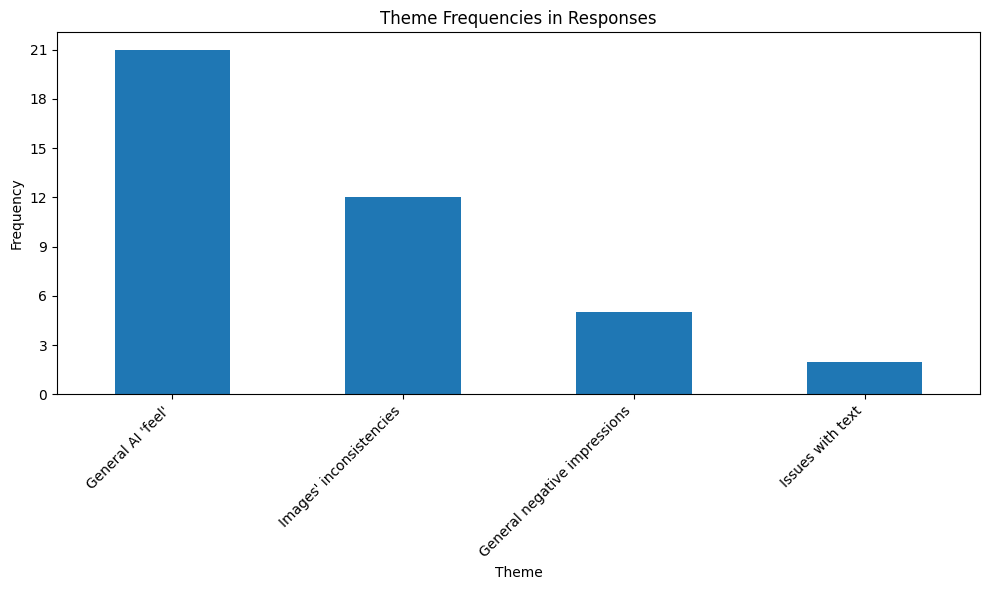

In [1145]:

import re
import nltk
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
import contractions
from fuzzywuzzy import process, fuzz
from nltk.stem import WordNetLemmatizer

# Load data (assuming df_suspect_b is already loaded)
df_suspect_b_openend = df_suspect_b.iloc[:, 1]
df_suspect_b_openend = pd.DataFrame(df_suspect_b_openend.dropna())
df_suspect_b_openend.columns = ['Responses']

# Set pandas to display full text in columns
pd.set_option('display.max_colwidth', None)

# Download stopwords and lemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Expand contractions
    text = contractions.fix(text)
    # Remove non-word characters
    text = re.sub(r'\W', ' ', str(text))
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Lemmatize words
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

df_suspect_b_openend['cleaned_responses'] = df_suspect_b_openend['Responses'].apply(preprocess_text)

# Define refined themes and keywords
themes = {
    "Images' inconsistencies": ['different', 'repeated', 'not being consistent', 'inconsistent', 'change', 'not similar', 'inconsistency',  'character', 'face', 'clothes', 'finger' ,'detail'],
    'Issues with text': ['text panel', 'punctuation'],
    'General negative impressions': [ 'hard', 'not very good', 'not perfect', 'weird', 'feel off',  'strange', 'irrelevance', 'uncanny', 'lack'],
    "General AI 'feel'": ['ai tool', 'ai generated', 'ai made', 'general look', 'quality', 'typical', 'reminded me of ai', 'style', 'texture', 'graphic', 'grapichs', 'illustration', 'figure', 'first glance']
}

def assign_themes(text):
    matched_themes = set()  # Use a set to ensure unique themes
    for theme, keywords in themes.items():
        for keyword in keywords:
            # Use fuzzy matching to allow for minor spelling errors
            if process.extractOne(keyword, [text], scorer=fuzz.token_set_ratio)[1] >= 90:
                matched_themes.add(theme)
    return list(matched_themes) if matched_themes else ['Other']

df_suspect_b_openend['Themes'] = df_suspect_b_openend['cleaned_responses'].apply(assign_themes)

# Print the DataFrame with full text in 'cleaned_responses' and 'Themes' for debugging
for index, row in df_suspect_b_openend.iterrows():
    print(f"Original: {row['Responses']}\nCleaned: {row['cleaned_responses']}\nThemes: {row['Themes']}\n")

# Explode the list of themes into separate rows for counting
df_exploded = df_suspect_b_openend.explode('Themes')

# Count theme frequencies
theme_counts = df_exploded['Themes'].value_counts()
print(theme_counts)

# Visualize
plt.figure(figsize=(10, 6))
theme_counts.plot(kind='bar')
plt.title('Theme Frequencies in Responses')
plt.xlabel('Theme')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
# Ensure only integers on the y-axis
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()


AI ENCODE AND PLOT


 BALANCED


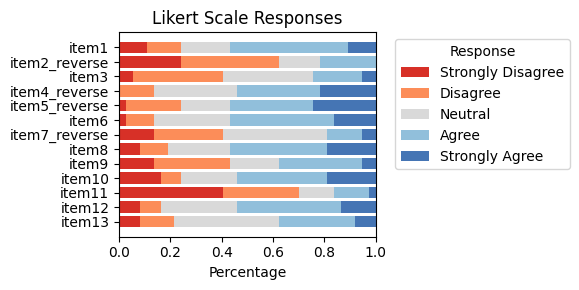

Index(['I am comfortable with the use of AI to illustrate narratives',
       'I believe that AI-generated illustrations have less value than human-crafted ones',
       'I believe generative AI is a way to democratize art, making it accessible to all',
       'Generative AI makes me angry', 'Generative AI scares me',
       'Generative AI interests me',
       'I believe generative AI steals artists' jobs',
       'I am often exposed to AI-generated textual content (e.g., generated by ChatGPT)',
       'I am often exposed to AI-generated visual content (e.g., generated by Dall-E)',
       'I regularly use AI-language generators (e.g., ChatGPT) when working with text',
       'I regularly use AI-image generators (e.g., Dall-E, Midjourney) when working with images',
       'I believe AI could help illustrate stories that would otherwise never be illustrated',
       'I believe using AI as it was used in this study can make literature more appealing for a broader audience'],
      dtype=

In [1146]:
ai_column_names = ["item1","item2_reverse","item3","item4_reverse","item5_reverse","item6", "item7_reverse", "item8","item9", "item10", "item11","item12", "item13"]
'''
#ALL
print("ALL")
df_copy = postest_graphicnovel.copy()
#isolate columns related to text/images
df_ai = df_copy.iloc[:, 22:35]
original_columns_ai = df_ai.columns.tolist()  #when i put real items they are too long!!
df_ai.columns = ai_column_names

#encode answers (applying reverse coding when needed)   
for column in df_ai.columns:
    #reverse coding
    if 'reverse' in column.lower():
        df_ai.loc[:, column] = df_ai[column].replace(likert_reverse_coding)
    #normal coding
    else:
        df_ai.loc[:, column] = df_ai[column].replace(likert_coding)


question_labels = original_columns_ai
prepared_ai = prepare_data_for_plotting(df_ai)
plot_likert_stacked(prepared_ai, "ai")

df_ai.columns = original_columns_ai
'''

#BALANCED
print("\n BALANCED")
df_copy_b = postest_balanced_gn.copy()
#isolate columns related to text/images
df_ai_b = df_copy_b.iloc[:, 22:35]
original_columns_ai_b = df_ai_b.columns.tolist()  #when i put real items they are too long!!
df_ai_b.columns = ai_column_names

#encode answers (applying reverse coding when needed)   
for column in df_ai_b.columns:
    #reverse coding
    if 'reverse' in column.lower():
        df_ai_b.loc[:, column] = df_ai_b[column].replace(likert_reverse_coding)
    #normal coding
    else:
        df_ai_b.loc[:, column] = df_ai_b[column].replace(likert_coding)


question_labels_b = original_columns_ai_b
prepared_ai_b = prepare_data_for_plotting(df_ai_b)
plot_likert_stacked(prepared_ai_b, "ai")

df_ai_b.columns = original_columns_ai_b
print(df_ai_b.columns )

CHI SQUARE TEST ON ALL ITEMS

In [1147]:
# Correctly handle reverse coding and labels in the plotting function

def get_labels(column):
    if 'reverse' in column.lower():
        return ['Strongly Agree', 'Agree', 'Neutral', 'Disagree', 'Strongly Disagree']
    else:
        return ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']

# Chi-square test results
chi_square_results = []

for statement in df_ai_b.columns:
    observed_frequencies = df_ai_b[statement].value_counts().reindex(range(1, 6), fill_value=0).sort_index()
    total_responses = observed_frequencies.sum()
    expected_frequencies = np.array([total_responses / 5] * 5)

    chi_square_stat = ((observed_frequencies - expected_frequencies) ** 2 / expected_frequencies).sum()
    df_ = len(observed_frequencies) - 1
    p_value = chi2.sf(chi_square_stat, df_)

    chi_square_results.append((statement, chi_square_stat, df_, p_value))

chi_square_df = pd.DataFrame(chi_square_results, columns=["Statement", "Chi-Square Statistic", "Degrees of Freedom", "p-value"])
chi_square_df




,Statement,Chi-Square Statistic,Degrees of Freedom,p-value
0,I am comfortable with the use of AI to illustrate narratives,16.378378,4,0.002551
1,I believe that AI-generated illustrations have less value than human-crafted ones,13.945946,4,0.007470
2,"I believe generative AI is a way to democratize art, making it accessible to all",16.378378,4,0.002551
3,Generative AI makes me angry,13.945946,4,0.007470
4,Generative AI scares me,8.810811,4,0.066006
5,Generative AI interests me,16.918919,4,0.002004
6,I believe generative AI steals artists' jobs,14.216216,4,0.006636
7,"I am often exposed to AI-generated textual content (e.g., generated by ChatGPT)",10.432432,4,0.033741
8,"I am often exposed to AI-generated visual content (e.g., generated by Dall-E)",9.351351,4,0.052893
9,"I regularly use AI-language generators (e.g., ChatGPT) when working with text",7.189189,4,0.126222


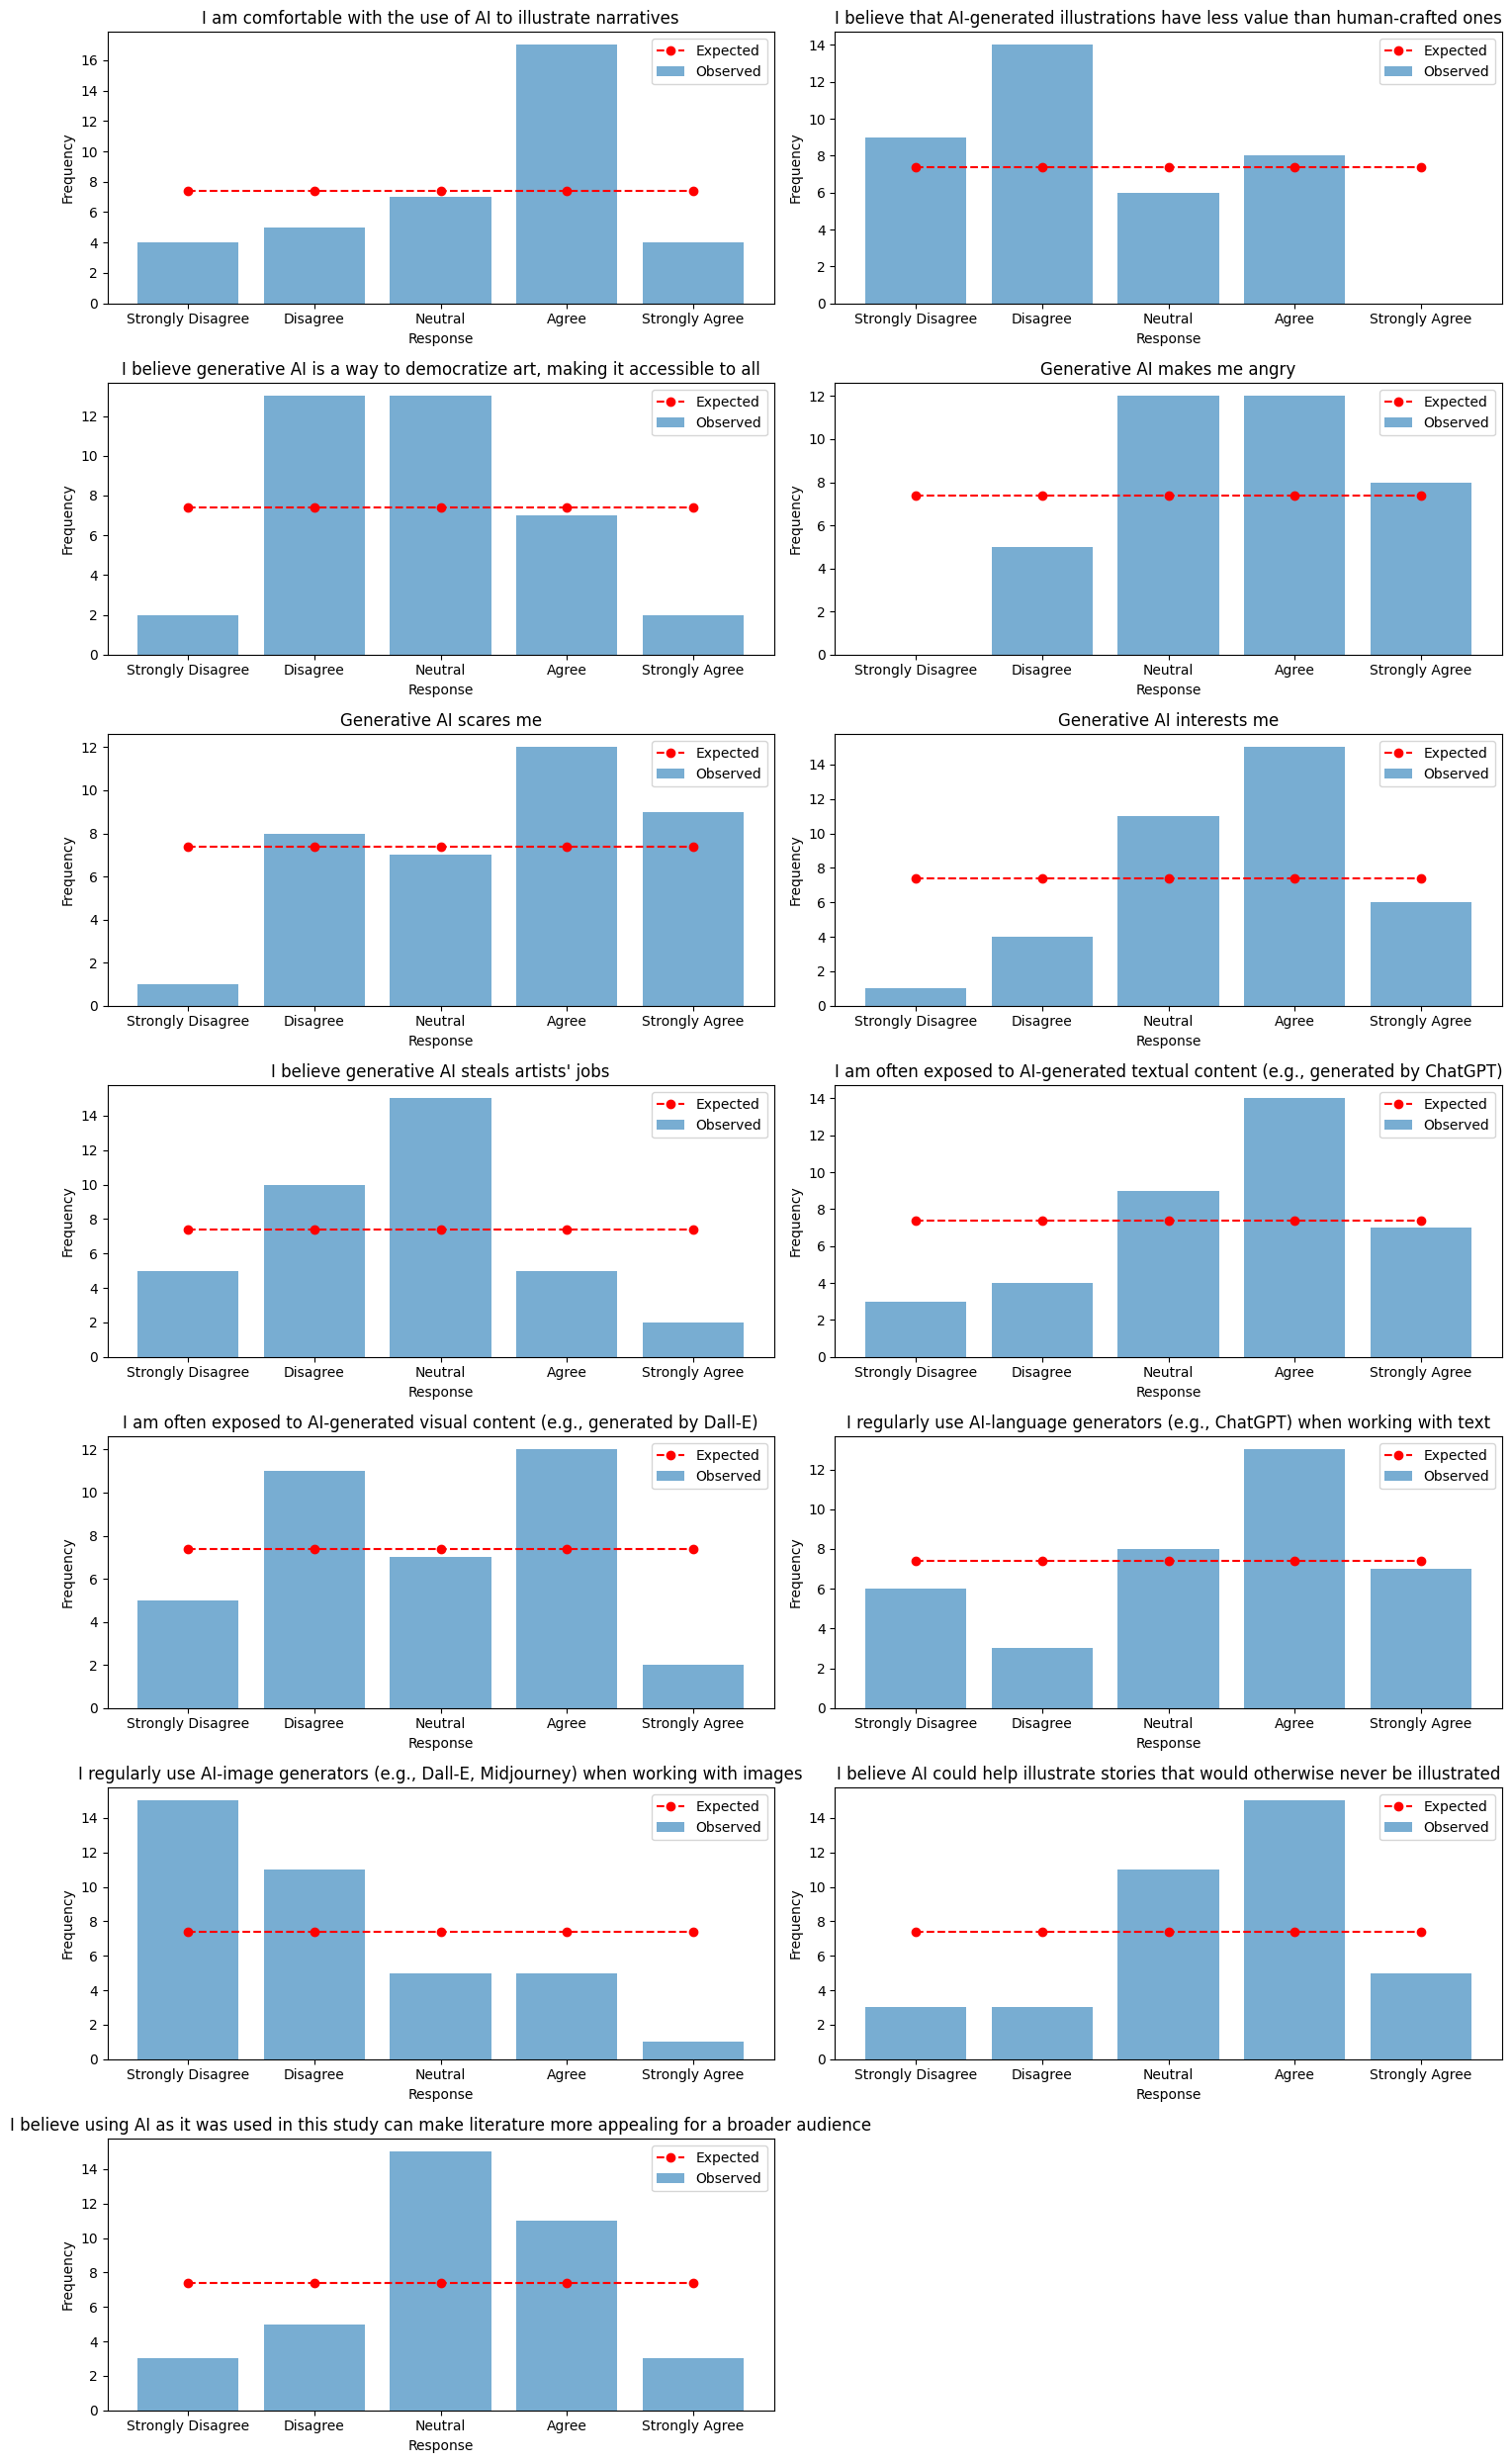

In [1148]:
import math
# Calculate the number of rows and columns for subplots
num_statements = len(df_ai_b.columns)
num_cols = 2  # Number of columns in the subplot grid
num_rows = math.ceil(num_statements / num_cols)  # Calculate the number of rows needed

# Plotting observed vs. expected frequencies with distinct labels
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 25))
axes = axes.flatten()

for ax, (statement, observed) in zip(axes, df_ai_b.items()):
    observed_frequencies = observed.value_counts().reindex(range(1, 6), fill_value=0).sort_index()
    total_responses = observed_frequencies.sum()
    expected_frequencies = np.array([total_responses / 5] * 5)

    if 'reverse' in statement.lower():
        categories = ['Strongly Agree', 'Agree', 'Neutral', 'Disagree', 'Strongly Disagree']
    else:
        categories = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']
        
    ax.bar(categories, observed_frequencies, alpha=0.6, label='Observed')
    ax.plot(categories, expected_frequencies, color='red', marker='o', linestyle='dashed', label='Expected')
    ax.set_title(statement)
    ax.set_xlabel('Response')
    ax.set_ylabel('Frequency')
    ax.legend()

# Hide any unused subplots
for i in range(len(df_ai_b.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


The results show that for several statements, there are significant deviations from an equal distribution of responses. This indicates that participants have strong and varying opinions on the use of AI in creative fields, with particular concerns about AI-generated illustrations' value, AI's role in democratizing art, and the impact on artists' jobs. There are also significant findings regarding participants' exposure to and usage of AI tools, reflecting diverse experiences and practices.

The non-significant results suggest areas where opinions are more evenly distributed or less polarized, such as the fear of generative AI and the regular use of AI-language generators. These findings can help identify which aspects of AI in creative fields are most contentious and which may require more nuanced exploration in future research.

GROUP ITEMS: POSITIVE/NEGATIVE, EXPOSITION_FREQ, STUDY_OPINION

ALL TOGETHER + TABLES


In [1149]:
import pandas as pd
from statsmodels.miscmodels.ordinal_model import OrderedModel

# Ensure all data is numeric
df_ai_b = df_ai_b.apply(pd.to_numeric, errors='coerce')

# Define the dependent variables and the independent variables
general_opinion_vars = df_ai_b.iloc[:, :7].columns
frequency_exposure_vars = df_ai_b.iloc[:, 7:11].columns
dependent_vars = df_ai_b.iloc[:, 11:13].columns

# Function to fit the model and extract results
def fit_and_extract_results(dep_vars, ind_vars, data):
    results_data = []
    for dep_var in dep_vars:
        model = OrderedModel(data[dep_var], data[ind_vars], distr='logit')
        result = model.fit(method='bfgs')
        for pred_var in ind_vars:
            coef = result.params[pred_var]
            conf_int = result.conf_int().loc[pred_var]
            lower = conf_int[0]
            upper = conf_int[1]
            p_value = result.pvalues[pred_var]
            results_data.append({
                'Dependent Variable': dep_var,
                'Predictor': pred_var,
                'Coefficient': coef,
                'Std. Error': result.bse[pred_var],
                'z-value': result.tvalues[pred_var],
                'p-value': p_value,
                '95% CI Lower': lower,
                '95% CI Upper': upper
            })
        # Extract threshold information
        thresholds = result.params.index[result.params.index.str.startswith('threshold')]
        for threshold in thresholds:
            coef = result.params[threshold]
            conf_int = result.conf_int().loc[threshold]
            lower = conf_int[0]
            upper = conf_int[1]
            p_value = result.pvalues[threshold]
            results_data.append({
                'Dependent Variable': dep_var,
                'Predictor': threshold,
                'Coefficient': coef,
                'Std. Error': result.bse[threshold],
                'z-value': result.tvalues[threshold],
                'p-value': p_value,
                '95% CI Lower': lower,
                '95% CI Upper': upper
            })
    return pd.DataFrame(results_data)

# Fit models for general opinion variables
general_opinion_results_df = fit_and_extract_results(dependent_vars, general_opinion_vars, df_ai_b)

# Fit models for frequency exposure variables
frequency_exposure_results_df = fit_and_extract_results(dependent_vars, frequency_exposure_vars, df_ai_b)


Optimization terminated successfully.
         Current function value: 1.109504
         Iterations: 36
         Function evaluations: 39
         Gradient evaluations: 39
Optimization terminated successfully.
         Current function value: 1.020496
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 1.314608
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 1.319680
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 24


In [1150]:

# Display the results as dataframes
print("Results for General Opinion Variables:")
general_opinion_results_df



Results for General Opinion Variables:


,Dependent Variable,Predictor,Coefficient,Std. Error,z-value,p-value,95% CI Lower,95% CI Upper
0,I believe AI could help illustrate stories that would otherwise never be illustrated,I am comfortable with the use of AI to illustrate narratives,0.517027,0.475629,1.087039,0.277019,-0.415188,1.449242
1,I believe AI could help illustrate stories that would otherwise never be illustrated,I believe that AI-generated illustrations have less value than human-crafted ones,0.352145,0.349649,1.007138,0.313868,-0.333155,1.037446
2,I believe AI could help illustrate stories that would otherwise never be illustrated,"I believe generative AI is a way to democratize art, making it accessible to all",1.099157,0.493534,2.227114,0.025940,0.131848,2.066467
3,I believe AI could help illustrate stories that would otherwise never be illustrated,Generative AI makes me angry,0.355586,0.498857,0.712803,0.475968,-0.622155,1.333327
4,I believe AI could help illustrate stories that would otherwise never be illustrated,Generative AI scares me,0.309582,0.397493,0.778836,0.436076,-0.469490,1.088654
5,I believe AI could help illustrate stories that would otherwise never be illustrated,Generative AI interests me,-0.272819,0.399208,-0.683402,0.494353,-1.055253,0.509614
6,I believe AI could help illustrate stories that would otherwise never be illustrated,I believe generative AI steals artists' jobs,-0.189582,0.445597,-0.425457,0.670504,-1.062936,0.683771
7,I believe using AI as it was used in this study can make literature more appealing for a broader audience,I am comfortable with the use of AI to illustrate narratives,1.725909,0.595154,2.899938,0.003732,0.559429,2.892389
8,I believe using AI as it was used in this study can make literature more appealing for a broader audience,I believe that AI-generated illustrations have less value than human-crafted ones,-0.184848,0.361221,-0.511730,0.608840,-0.892829,0.523133
9,I believe using AI as it was used in this study can make literature more appealing for a broader audience,"I believe generative AI is a way to democratize art, making it accessible to all",0.712621,0.474322,1.502400,0.132994,-0.217033,1.642275


In [1151]:

print("\nResults for Frequency Exposure Variables:")
frequency_exposure_results_df


Results for Frequency Exposure Variables:


,Dependent Variable,Predictor,Coefficient,Std. Error,z-value,p-value,95% CI Lower,95% CI Upper
0,I believe AI could help illustrate stories that would otherwise never be illustrated,"I am often exposed to AI-generated textual content (e.g., generated by ChatGPT)",-0.219680,0.351455,-0.625059,0.531932,-0.908520,0.469159
1,I believe AI could help illustrate stories that would otherwise never be illustrated,"I am often exposed to AI-generated visual content (e.g., generated by Dall-E)",-0.755123,0.358641,-2.105509,0.035247,-1.458047,-0.052198
2,I believe AI could help illustrate stories that would otherwise never be illustrated,"I regularly use AI-language generators (e.g., ChatGPT) when working with text",0.309797,0.319721,0.968960,0.332565,-0.316845,0.936439
3,I believe AI could help illustrate stories that would otherwise never be illustrated,"I regularly use AI-image generators (e.g., Dall-E, Midjourney) when working with images",0.664157,0.348082,1.908048,0.056385,-0.018071,1.346385
4,I believe using AI as it was used in this study can make literature more appealing for a broader audience,"I am often exposed to AI-generated textual content (e.g., generated by ChatGPT)",0.095424,0.344437,0.277044,0.781746,-0.579659,0.770507
5,I believe using AI as it was used in this study can make literature more appealing for a broader audience,"I am often exposed to AI-generated visual content (e.g., generated by Dall-E)",-0.873422,0.373349,-2.339423,0.019314,-1.605173,-0.141671
6,I believe using AI as it was used in this study can make literature more appealing for a broader audience,"I regularly use AI-language generators (e.g., ChatGPT) when working with text",0.174032,0.301888,0.576479,0.564292,-0.417657,0.765721
7,I believe using AI as it was used in this study can make literature more appealing for a broader audience,"I regularly use AI-image generators (e.g., Dall-E, Midjourney) when working with images",0.603105,0.364988,1.652396,0.098454,-0.112258,1.318468


coefficient plot

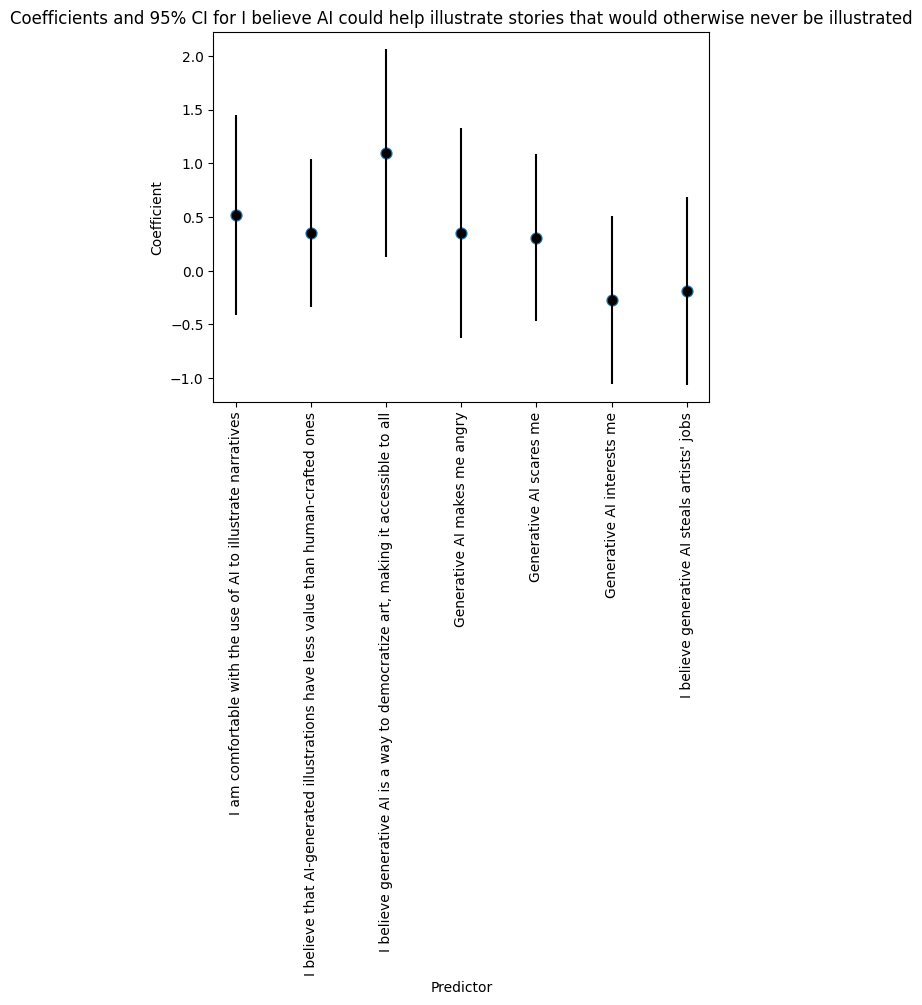

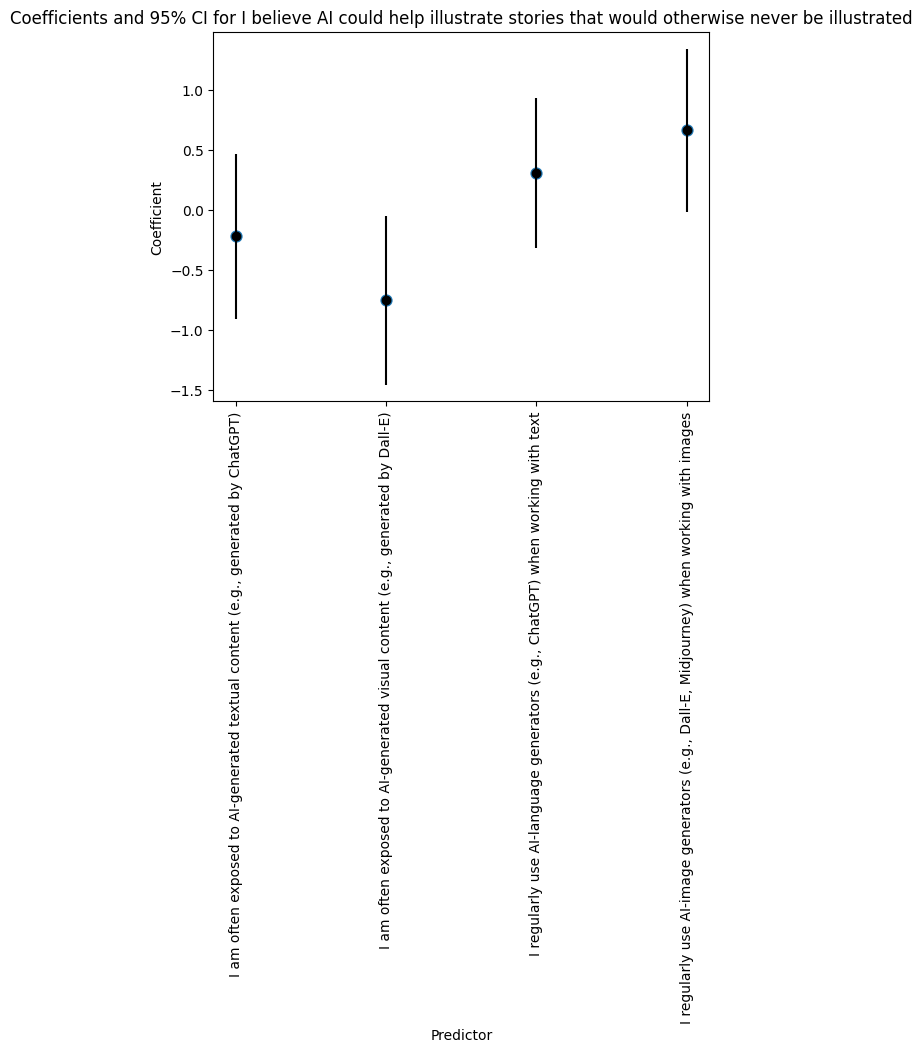

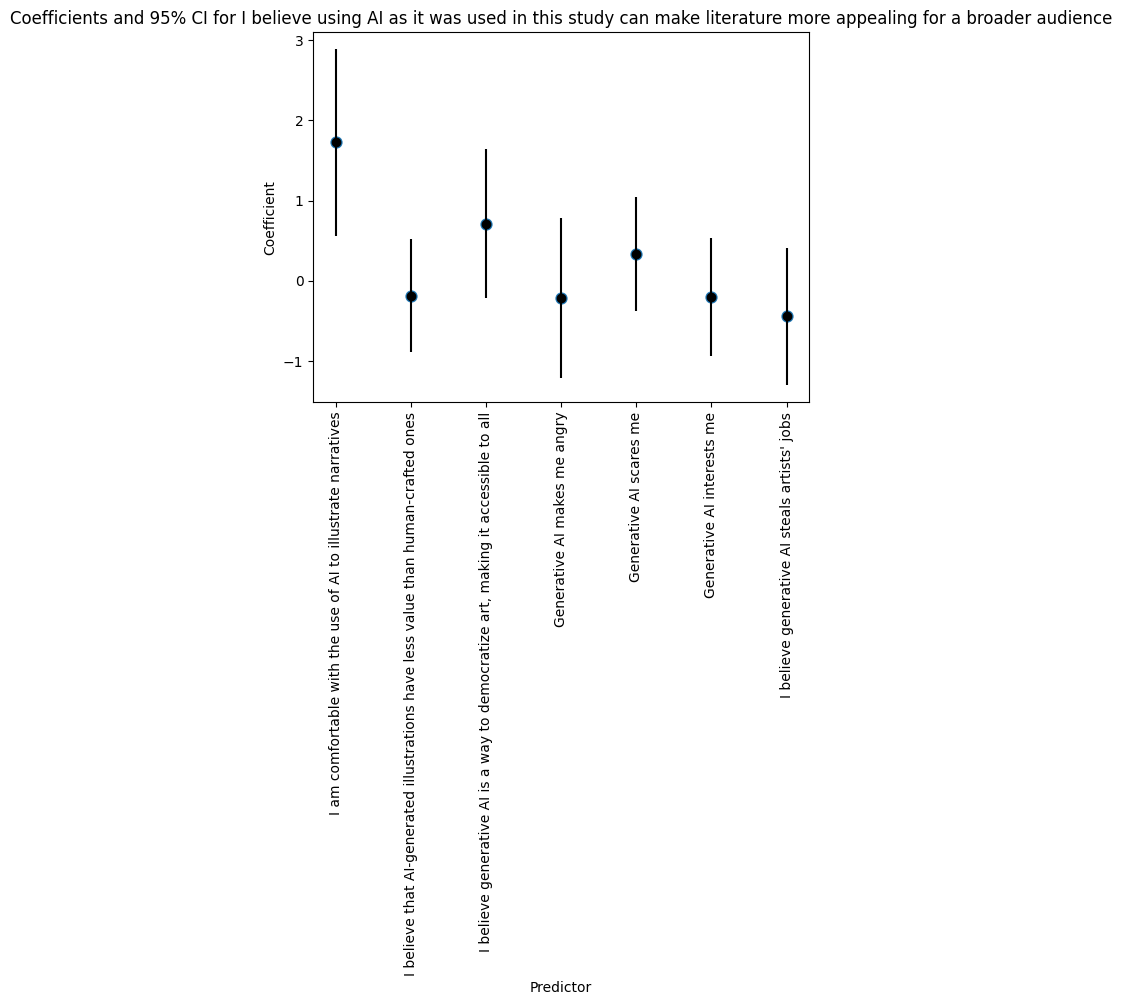

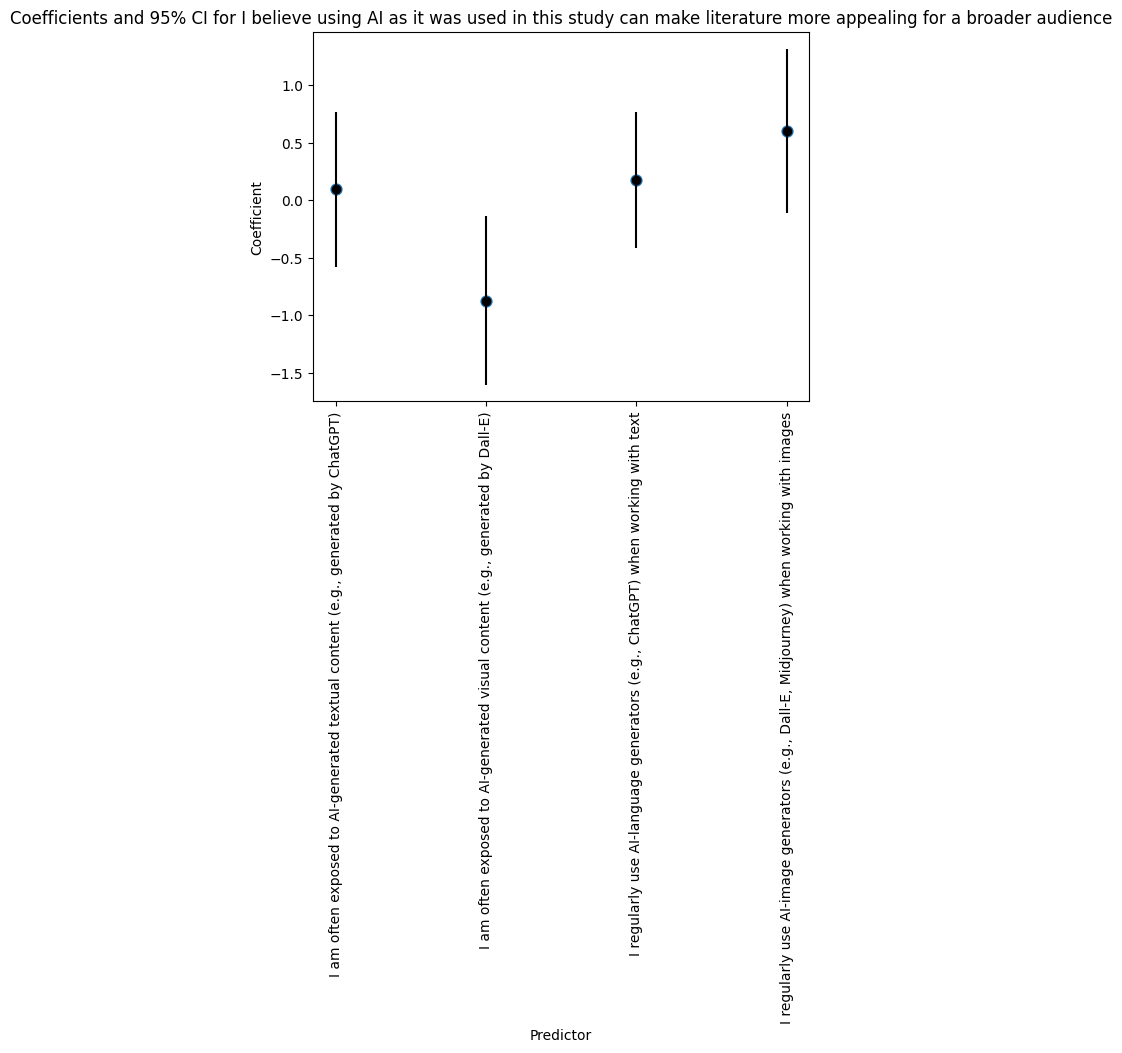

In [1152]:
def plot_coefficients(results_df, dependent_var):
    data = results_df[results_df['Dependent Variable'] == dependent_var]
    sns.pointplot(x='Predictor', y='Coefficient', data=data, join=False)
    plt.errorbar(x=data['Predictor'], y=data['Coefficient'], 
                 yerr=[data['Coefficient'] - data['95% CI Lower'], data['95% CI Upper'] - data['Coefficient']],
                 fmt='o', color='black')
    plt.xticks(rotation=90)
    plt.title(f'Coefficients and 95% CI for {dependent_var}')
    plt.show()

# Plot coefficients for each dependent variable
for dep_var in dependent_vars:
    plot_coefficients(general_opinion_results_df, dep_var)
    plot_coefficients(frequency_exposure_results_df, dep_var)

CHANGE OF RATINGS AFTER DISCOVERY THAT AI IS INVOLVED

OLD ONES OF THOSE WHO CHANGED OPINION


 BALANCED
(9, 4)


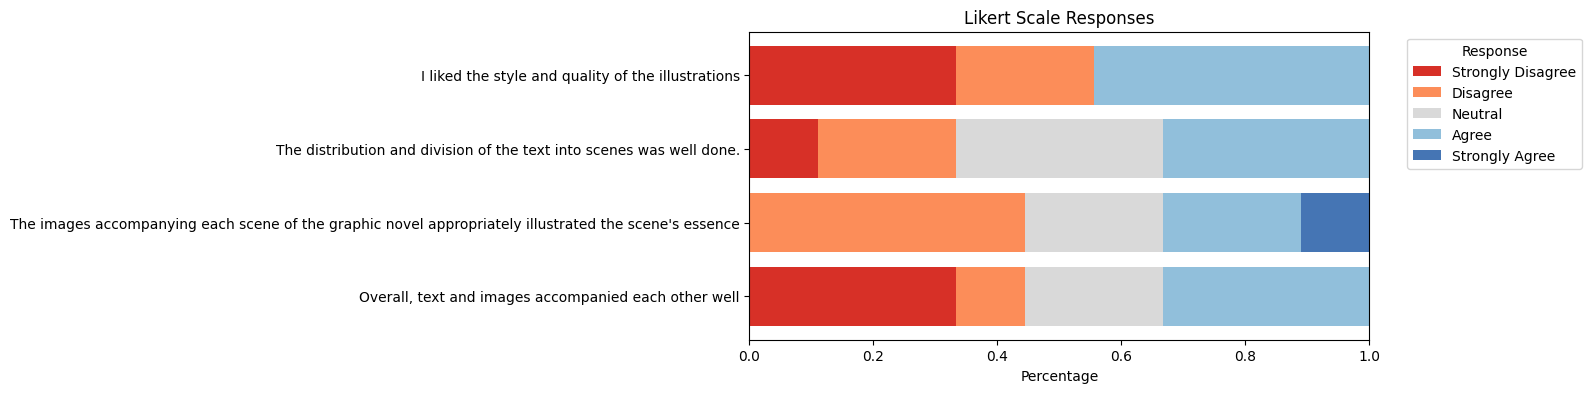

(9, 2)


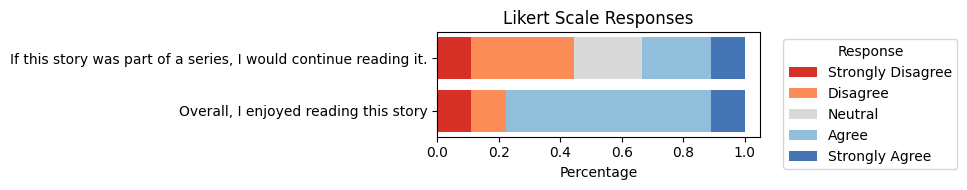

In [1153]:
'''
print("ALL")
#clean df about "change opinion"
df_change_opinion = postest_graphicnovel.iloc[:, 35:36]
#extract indexes of those who changed idea
indexes_yes = df_change_opinion.loc[df_change_opinion.iloc[:, 0] == 'Yes'].index

#get their initial text_image and enjoyment rating
#text_image
old_text_image = df_text_images.loc[indexes_yes]
print(old_text_image.shape)
#plot it
question_labels = old_text_image.columns
prepared_old_ti = prepare_data_for_plotting(old_text_image)
plot_likert_stacked(prepared_old_ti, "text_image")


#enjoyment
old_enjoyment = df_enjoyment_gn.loc[indexes_yes]
print(old_enjoyment.shape)
#plot it
question_labels = old_enjoyment.columns
prepared_old_enj = prepare_data_for_plotting(old_enjoyment)
plot_likert_stacked(prepared_old_enj, "enjoyment")
'''

print("\n BALANCED")
df_change_opinion_b = postest_balanced_gn.iloc[:, 35:36]
#extract indexes of those who changed idea
indexes_yes_b = df_change_opinion_b.loc[df_change_opinion_b.iloc[:, 0] == 'Yes'].index

#get their initial text_image and enjoyment rating
#text_image
old_text_image_b = df_text_images_b.loc[indexes_yes_b]
print(old_text_image_b.shape)
#plot it
question_labels_b = old_text_image_b.columns
prepared_old_ti_b = prepare_data_for_plotting(old_text_image_b)
plot_likert_stacked(prepared_old_ti_b, "text_image")


#enjoyment
old_enjoyment_b = df_enjoyment_gn_balanced.loc[indexes_yes_b]
print(old_enjoyment_b.shape)
#plot it
question_labels_b = old_enjoyment_b.columns
prepared_old_enj_b = prepare_data_for_plotting(old_enjoyment_b)
plot_likert_stacked(prepared_old_enj_b, "enjoyment")

In [1154]:
'''
import pandas as pd
import numpy as np
from scipy.stats import chi2

# Chi-square test results
chi_square_results = []

for statement in old_enjoyment_b.columns:
    # Calculate observed frequencies
    observed_frequencies = old_enjoyment_b[statement].value_counts().reindex(range(1, 6), fill_value=0).sort_index()
    total_responses = observed_frequencies.sum()
    expected_frequencies = np.array([total_responses / 5] * 5)
    
    # Calculate chi-square statistic
    chi_square_stat = ((observed_frequencies - expected_frequencies) ** 2 / expected_frequencies).sum()
    
    # Degrees of freedom
    df_ = len(observed_frequencies) - 1
    
    # p-value
    p_value = chi2.sf(chi_square_stat, df_)
    
    chi_square_results.append((statement, chi_square_stat, df_, p_value))

# Convert results to DataFrame for easy viewing
chi_square_df = pd.DataFrame(chi_square_results, columns=["Statement", "Chi-Square Statistic", "Degrees of Freedom", "p-value"])
chi_square_df
'''

'\nimport pandas as pd\nimport numpy as np\nfrom scipy.stats import chi2\n\n# Chi-square test results\nchi_square_results = []\n\nfor statement in old_enjoyment_b.columns:\n    # Calculate observed frequencies\n    observed_frequencies = old_enjoyment_b[statement].value_counts().reindex(range(1, 6), fill_value=0).sort_index()\n    total_responses = observed_frequencies.sum()\n    expected_frequencies = np.array([total_responses / 5] * 5)\n    \n    # Calculate chi-square statistic\n    chi_square_stat = ((observed_frequencies - expected_frequencies) ** 2 / expected_frequencies).sum()\n    \n    # Degrees of freedom\n    df_ = len(observed_frequencies) - 1\n    \n    # p-value\n    p_value = chi2.sf(chi_square_stat, df_)\n    \n    chi_square_results.append((statement, chi_square_stat, df_, p_value))\n\n# Convert results to DataFrame for easy viewing\nchi_square_df = pd.DataFrame(chi_square_results, columns=["Statement", "Chi-Square Statistic", "Degrees of Freedom", "p-value"])\nchi_squ

NEW ONES OF THOSE WHO CHANGED OPINION


 BALANCED


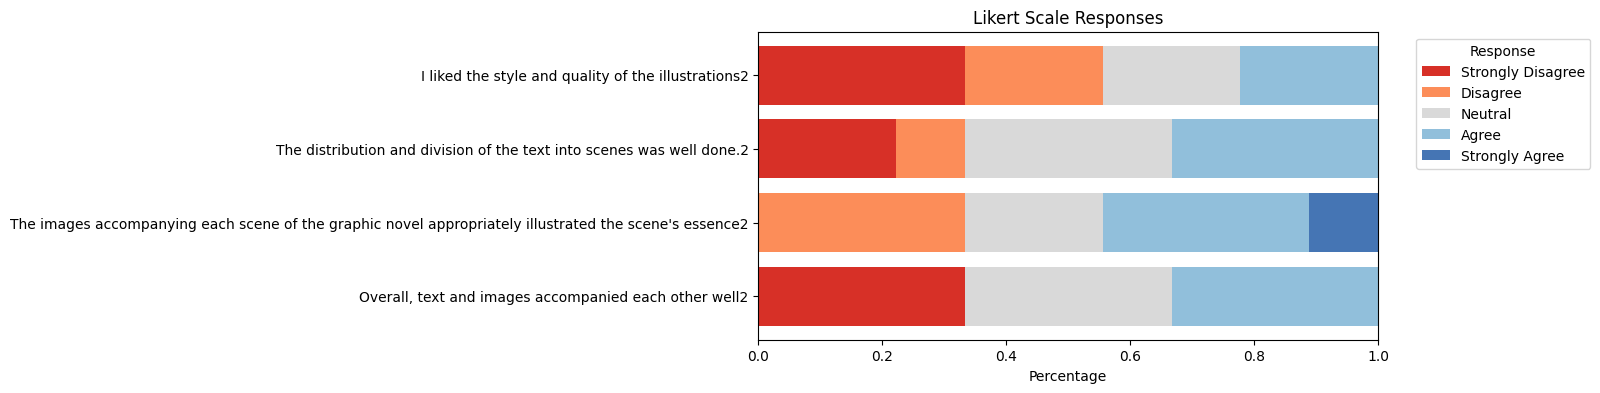

In [1155]:
'''
print("ALL")
#isolate columns related to text/images
change_text_images = postest_graphicnovel.iloc[:, 36:40]

for column in change_text_images.columns:
    change_text_images.loc[:, column] = change_text_images[column].replace(likert_coding)

question_labels = change_text_images.columns
prepared = prepare_data_for_plotting(change_text_images)
plot_likert_stacked(prepared, "text_image")

# Drop rows containing NaN values
change_text_images = change_text_images.dropna(subset=[change_text_images.columns[0]])
# Convert the first column to integers
change_text_images.iloc[:, :] = change_text_images.iloc[:, :].astype(int)
#print(change_text_images)
'''
print("\n BALANCED")
#isolate columns related to text/images
change_text_images_b = postest_balanced_gn.iloc[:, 36:40]

for column in change_text_images_b.columns:
    change_text_images_b.loc[:, column] = change_text_images_b[column].replace(likert_coding)

question_labels_b = change_text_images_b.columns
prepared_b = prepare_data_for_plotting(change_text_images_b)
plot_likert_stacked(prepared_b, "text_image")

# Drop rows containing NaN values
change_text_images_b = change_text_images_b.dropna(subset=[change_text_images_b.columns[0]])
# Convert the first column to integers
change_text_images_b.iloc[:, :] = change_text_images_b.iloc[:, :].astype(int)
#print(change_text_images)




 BALANCED
Index(['If this story was part of a series, I would continue reading it.2', 'Overall, I enjoyed reading the graphic novel2'], dtype='object')


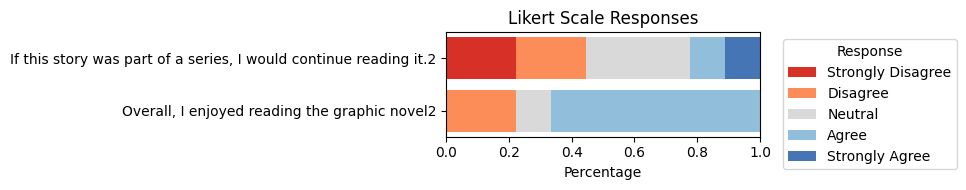

In [1156]:
'''
print("ALL")
#new overall enjoyment
change_enjoyment = postest_graphicnovel.iloc[:, 40:42]
print(change_enjoyment.columns)
for column in change_enjoyment.columns:
    change_enjoyment.loc[:, column] = change_enjoyment[column].replace(likert_coding)


question_labels = change_enjoyment.columns
prepared = prepare_data_for_plotting(change_enjoyment)
plot_likert_stacked(prepared, "enjoyment")

# Drop rows containing NaN values
change_enjoyment = change_enjoyment.dropna(subset=[change_enjoyment.columns[0]])
# Convert the first column to integers
change_enjoyment.iloc[:, :] = change_enjoyment.iloc[:, :].astype(int)
'''
print("\n BALANCED")
#new overall enjoyment
change_enjoyment_b = postest_balanced_gn.iloc[:, 40:42]
print(change_enjoyment_b.columns)
for column in change_enjoyment_b.columns:
    change_enjoyment_b.loc[:, column] = change_enjoyment_b[column].replace(likert_coding)


question_labels_b = change_enjoyment_b.columns
prepared_b = prepare_data_for_plotting(change_enjoyment_b)
plot_likert_stacked(prepared_b, "enjoyment")

# Drop rows containing NaN values
change_enjoyment_b = change_enjoyment_b.dropna(subset=[change_enjoyment_b.columns[0]])
# Convert the first column to integers
change_enjoyment_b.iloc[:, :] = change_enjoyment_b.iloc[:, :].astype(int)


CHECK HOW MANY OF THOSE THAT ARE CHANGING OPIONION DID NOT SUSPECT AI

In [1157]:
no_suspect_indexes = df_suspect_b[df_suspect_b['Did you suspect AI was involved in creating the graphic novel you just read?'] == 'No'].index
print("number of people that did not know ai was involved", len(no_suspect_indexes))
yes_suspect_indexes = df_suspect_b[df_suspect_b['Did you suspect AI was involved in creating the graphic novel you just read?'] == 'Yes'].index
print("number of people that knew ai was involved", len(yes_suspect_indexes))
changed_opinion_indexes = change_text_images_b.index
print("number of people that changed opinion", len(changed_opinion_indexes))

intersection_indexes_no = changed_opinion_indexes.intersection(no_suspect_indexes)
num_participants_no = len(intersection_indexes_no)
print(f'participants who changed their opinion and did not suspect AI involvement: {num_participants_no}', '\n',intersection_indexes_no)

intersection_indexes_yes = changed_opinion_indexes.intersection(yes_suspect_indexes)
num_participants_yes = len(intersection_indexes_yes)
print(f'participants who changed their opinion and did not suspect AI involvement: {num_participants_yes}', '\n',intersection_indexes_yes )

number of people that did not know ai was involved 11
number of people that knew ai was involved 26
number of people that changed opinion 9
participants who changed their opinion and did not suspect AI involvement: 1 
 Index(['609e4a1bee567106a668ca8e'], dtype='object', name='prolific_ID')
participants who changed their opinion and did not suspect AI involvement: 8 
 Index(['5e87a6ee14560f0d57e1f984', '5f7f5e8b8a10ca0f5fffd9f9',
       '5fb2d087a956be967181e2d1', '5e822b16f4c3fb9446c4ac8e',
       '5e62bf1518b42b05d6950408', '5fd85707af5bd719a5e20419',
       '5f9dde49bcf5b5363fe6c6a3', '5e860198a846e30497df5189'],
      dtype='object', name='prolific_ID')


RUN TEST TO SEE IF THE RATINGS CHANGED SIGNIFICANTLY

In [1158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, ttest_rel, wilcoxon

def perform_paired_tests_and_plot(df_old, df_new):
    results = []

    for column in df_old.columns:  # Skip the first column if it is an identifier
        old_ratings = df_old[column]
        new_ratings = df_new[column]
        differences = old_ratings - new_ratings
        
        print(differences)

        # Histogram of differences
        plt.figure(figsize=(5,5))
        bins = np.arange(differences.min() - 0.5, differences.max() + 1.5, 1)
        sns.histplot(differences, bins=bins, kde=True)
        plt.title(f'{column}')
        plt.xlabel('Difference (Old - New)')
        plt.ylabel('Frequency')
        plt.xticks(np.arange(differences.min(), differences.max() + 1, 1))
        plt.tight_layout()
        plt.show()
        
        # Box plot of differences
        plt.figure(figsize=(5, 5))
        sns.boxplot(y=differences)
        plt.title(f'{column}')
        plt.ylabel('Difference (Old - New)')
        plt.tight_layout()
        plt.show()

        # Check for normality
        stat, p_value = shapiro(differences)
        if p_value > 0.05:
            print("shapiro:", stat, p_value)
            # If the differences are normally distributed, use paired t-test
            test_stat, test_p_value = ttest_rel(old_ratings, new_ratings)
            test_name = 'Paired t-test'
            print(test_name, test_stat, test_p_value)
            if test_p_value < 0.05:
                print("SIGNIFICANT DIFFERENCE")
        else:
            print("can't run paired t-test")
            print("shapiro:", stat, p_value)
        
        # also use Wilcoxon signed-rank test
        test_stat, test_p_value = wilcoxon(old_ratings, new_ratings)
        test_name = 'Wilcoxon signed-rank test'
        print(test_name, test_stat, test_p_value)
        if test_p_value < 0.05:
                print("SIGNIFICANT DIFFERENCE")
        
       

TEXT-IMAGE OPINION

prolific_ID
609e4a1bee567106a668ca8e    0
5e87a6ee14560f0d57e1f984    0
5f7f5e8b8a10ca0f5fffd9f9    0
5fb2d087a956be967181e2d1    0
5e822b16f4c3fb9446c4ac8e    0
5e62bf1518b42b05d6950408    1
5fd85707af5bd719a5e20419    0
5f9dde49bcf5b5363fe6c6a3    0
5e860198a846e30497df5189    1
Name: I liked the style and quality of the illustrations, dtype: object


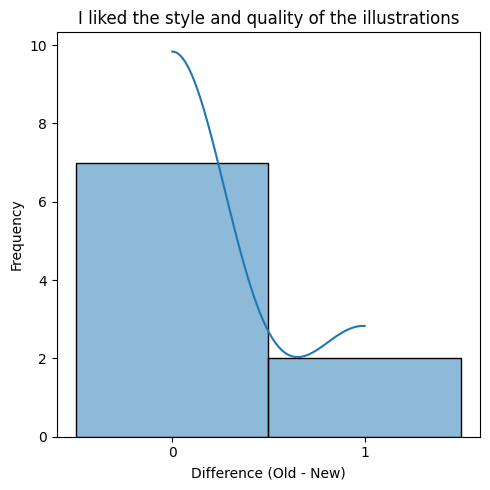

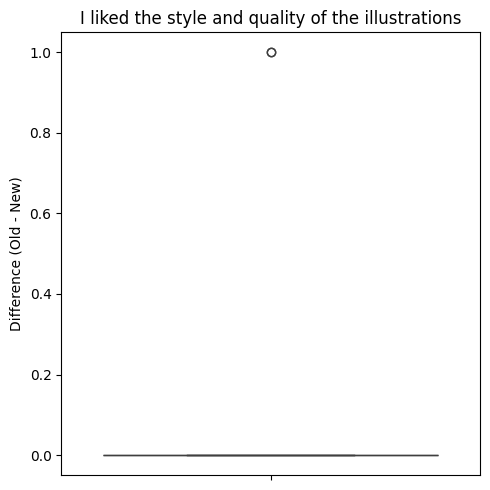

can't run paired t-test
shapiro: 0.5358099937438965 1.686041650827974e-05
Wilcoxon signed-rank test 0.0 0.15729920705028502
prolific_ID
609e4a1bee567106a668ca8e     1
5e87a6ee14560f0d57e1f984     0
5f7f5e8b8a10ca0f5fffd9f9    -1
5fb2d087a956be967181e2d1     2
5e822b16f4c3fb9446c4ac8e     0
5e62bf1518b42b05d6950408    -2
5fd85707af5bd719a5e20419     1
5f9dde49bcf5b5363fe6c6a3     0
5e860198a846e30497df5189     0
Name: The distribution and division of the text into scenes was well done., dtype: object


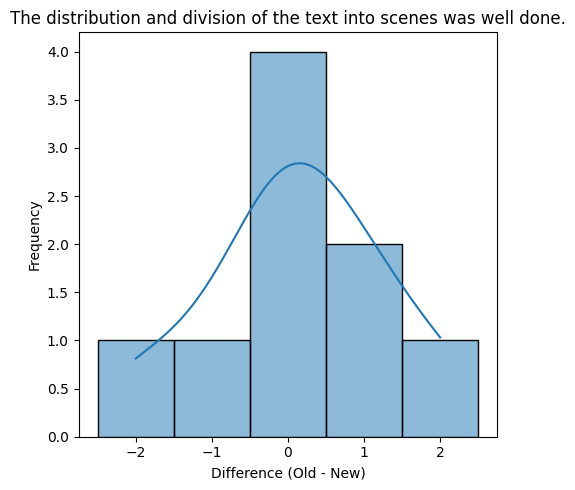

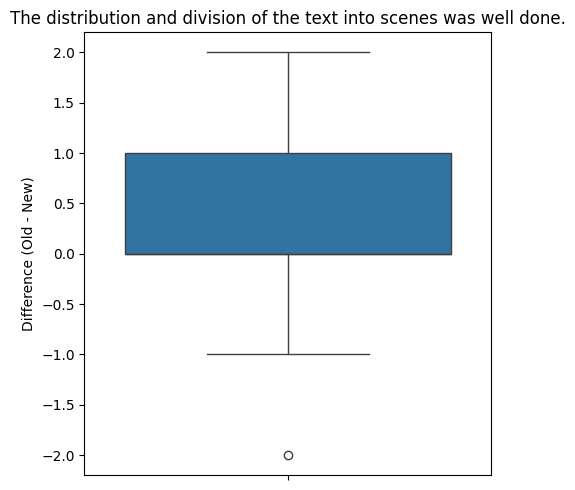

shapiro: 0.9412230849266052 0.5948319435119629
Paired t-test 0.2857142857142857 0.782355278822183
Wilcoxon signed-rank test 6.5 0.7825279247400674
prolific_ID
609e4a1bee567106a668ca8e     0
5e87a6ee14560f0d57e1f984     0
5f7f5e8b8a10ca0f5fffd9f9     0
5fb2d087a956be967181e2d1    -1
5e822b16f4c3fb9446c4ac8e     0
5e62bf1518b42b05d6950408     0
5fd85707af5bd719a5e20419    -1
5f9dde49bcf5b5363fe6c6a3     0
5e860198a846e30497df5189     0
Name: The images accompanying each scene of the graphic novel appropriately illustrated the scene's essence, dtype: object


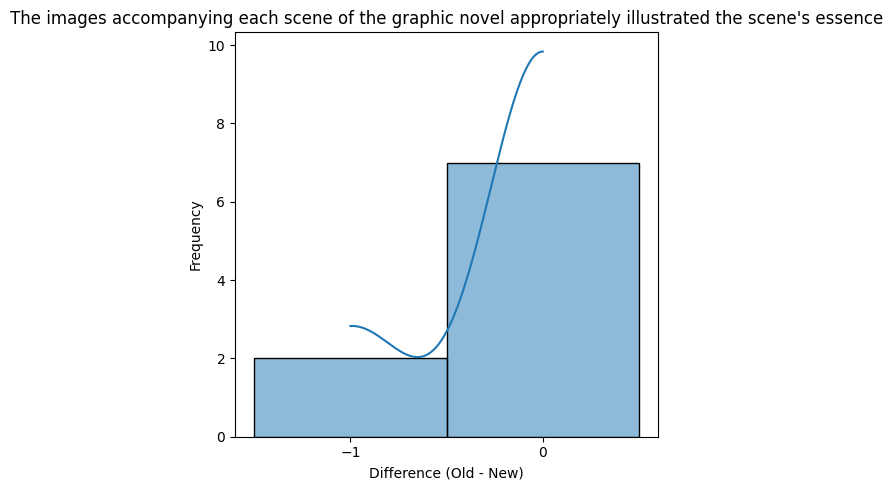

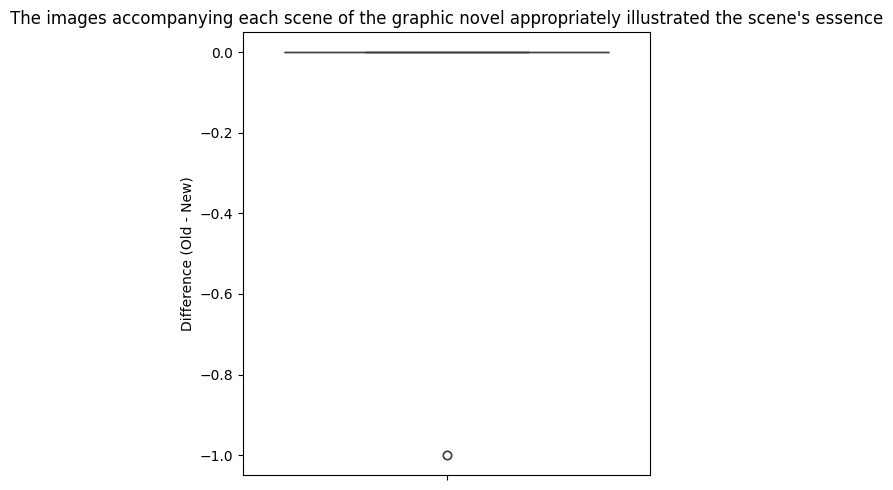

can't run paired t-test
shapiro: 0.5358098745346069 1.6860345567693003e-05
Wilcoxon signed-rank test 0.0 0.15729920705028502
prolific_ID
609e4a1bee567106a668ca8e     0
5e87a6ee14560f0d57e1f984     0
5f7f5e8b8a10ca0f5fffd9f9     0
5fb2d087a956be967181e2d1     0
5e822b16f4c3fb9446c4ac8e     0
5e62bf1518b42b05d6950408    -2
5fd85707af5bd719a5e20419     0
5f9dde49bcf5b5363fe6c6a3     0
5e860198a846e30497df5189     1
Name: Overall, text and images accompanied each other well, dtype: object


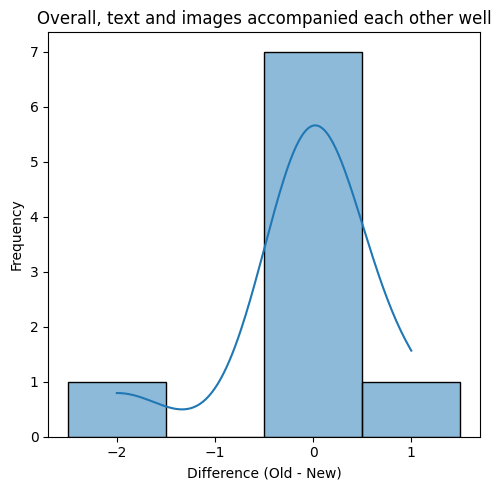

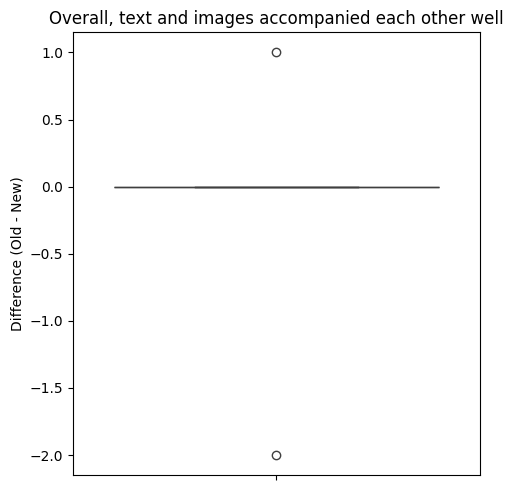

can't run paired t-test
shapiro: 0.6379221677780151 0.00026644475292414427
Wilcoxon signed-rank test 1.0 0.6547208460185769


In [1159]:
# Perform paired tests and plot for text and image integration
change_text_images_b.columns = old_text_image_b.columns
results_text_image = perform_paired_tests_and_plot(old_text_image_b, change_text_images_b)


ENJOYMENT OPINION

prolific_ID
609e4a1bee567106a668ca8e    0
5e87a6ee14560f0d57e1f984    1
5f7f5e8b8a10ca0f5fffd9f9    0
5fb2d087a956be967181e2d1    1
5e822b16f4c3fb9446c4ac8e    0
5e62bf1518b42b05d6950408    0
5fd85707af5bd719a5e20419    0
5f9dde49bcf5b5363fe6c6a3    0
5e860198a846e30497df5189    0
Name: If this story was part of a series, I would continue reading it., dtype: object


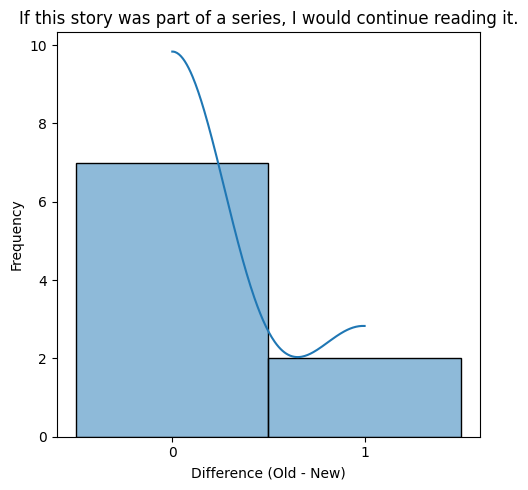

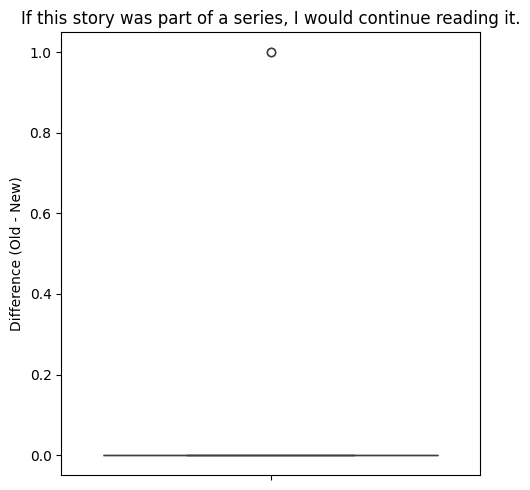

can't run paired t-test
shapiro: 0.5358099937438965 1.686041650827974e-05
Wilcoxon signed-rank test 0.0 0.15729920705028502
prolific_ID
609e4a1bee567106a668ca8e     0
5e87a6ee14560f0d57e1f984    -1
5f7f5e8b8a10ca0f5fffd9f9     0
5fb2d087a956be967181e2d1     0
5e822b16f4c3fb9446c4ac8e     1
5e62bf1518b42b05d6950408     0
5fd85707af5bd719a5e20419     0
5f9dde49bcf5b5363fe6c6a3     0
5e860198a846e30497df5189     1
Name: Overall, I enjoyed reading this story, dtype: object


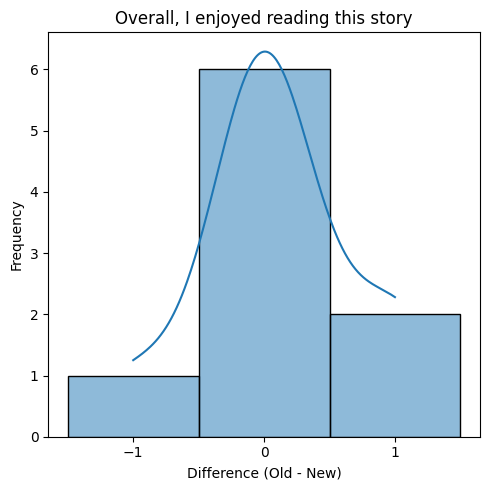

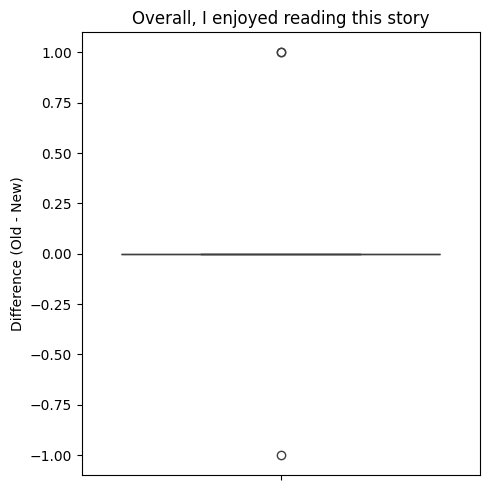

can't run paired t-test
shapiro: 0.780525803565979 0.012213178910315037
Wilcoxon signed-rank test 2.0 0.5637028616507731


In [1160]:

# Perform paired tests and plot for overall enjoyment
change_enjoyment_b.columns = old_enjoyment_b.columns
results_enjoyment = perform_paired_tests_and_plot(old_enjoyment_b, change_enjoyment_b)

In [1161]:
'''
#image comments
#all
df_image_comments = postest_graphicnovel.iloc[:, 42:43]
print(df_image_comments.columns)
'''

#image comments
#balanced
df_image_comments_b = postest_balanced_gn.iloc[:, 42:43]
print(df_image_comments_b)

                                                                                                                                                                                                                                                                                                             Any additional comments or thoughts on AI-generated illustrations?
prolific_ID                                                                                                                                                                                                                                                                                                                                                                    
5c55c7cb9b583c000159f790                                                                                                                                                                                                                                                

GO BACK AND FORTH

In [1162]:
frequency_mapping_reverse = {'Never': 5, 'Rarely': 4, 'Sometimes': 3, 'Often': 2, 'Always': 1}

#ALL
#GRAPHIC NOVEL
df_copy = postest_graphicnovel.copy()
#isolate columns related to text/images
df_goback_gn = df_copy.iloc[:, 43:44]
df_goback_gn = df_goback_gn.replace(frequency_mapping_reverse).apply(pd.to_numeric, errors='coerce')
#TEXTONLY
df_copy = postest_textonly.copy()
#isolate columns related to text/images
df_goback_to = df_copy.iloc[:, 16:17]
df_goback_to = df_goback_to.replace(frequency_mapping_reverse).apply(pd.to_numeric, errors='coerce')

#BALANCED
#GRAPHIC NOVEL
df_copy_b = postest_balanced_gn.copy()
#isolate columns related to text/images
df_goback_gn_b = df_copy_b.iloc[:, 43:44]
df_goback_gn_b = df_goback_gn_b.replace(frequency_mapping_reverse).apply(pd.to_numeric, errors='coerce')
#TEXTONLY
df_copy_b = postest_balanced_to.copy()
#isolate columns related to text/images
df_goback_to_b = df_copy_b.iloc[:, 16:17]
df_goback_to_b = df_goback_to_b.replace(frequency_mapping_reverse).apply(pd.to_numeric, errors='coerce')

THIS IS SAME FUNCTION BUT DIFFERENT RESPONSE LABELS -> DO IT NICER WITH A PARAM MAYBE

In [1163]:
# Plot the Data
def plot_likert_stacked_frequency(response_counts):
    # Define the color palette with custom colors
    colors = ['#d73027', '#fc8d59', '#d9d9d9', '#91bfdb', '#4575b4']
    response_labels = ['Never', 'Seldom', 'Half of the time', 'Often', 'Always']
    
    fig, ax = plt.subplots(figsize=(8, 3))

    # Plot each response category
    bottom = None
    for i, response in enumerate(response_counts.columns):
        if bottom is None:
            ax.barh(response_counts.index, response_counts[response], color=colors[i], label=response_labels[i])
            bottom = response_counts[response]
        else:
            ax.barh(response_counts.index, response_counts[response], left=bottom, color=colors[i], label=response_labels[i])
            bottom += response_counts[response]
    
    # Remove y-axis ticks and labels (this will remove the long sentence on the left)
    ax.set_yticks([])
    ax.set_yticklabels([])
    
    # Add legend and labels
    ax.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_xlabel('Percentage')
    ax.set_title('Frequency of going back and forth while reading')
    
    plt.tight_layout()
    plt.show()

# Example usage
# Assuming `response_counts` is your data
# plot_likert_stacked_frequency(response_counts)



 BALANCED


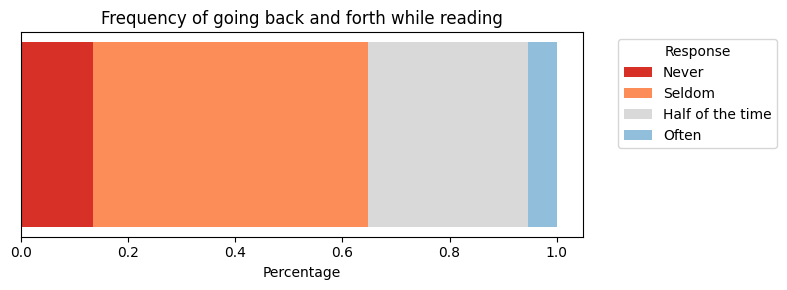

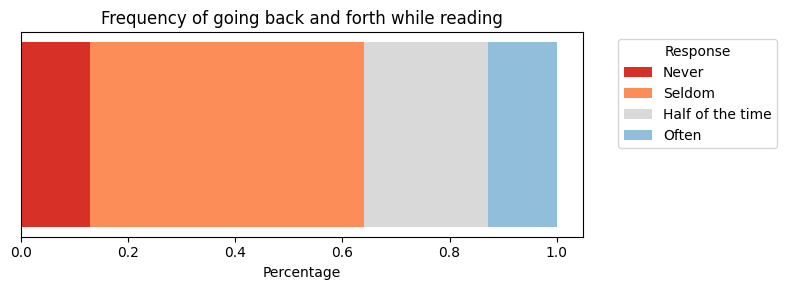

In [1164]:
'''
print("ALL")
question_labels = df_goback_gn.columns
prepared_gn_go_back = prepare_data_for_plotting(df_goback_gn)
plot_likert_stacked_frequency(prepared_gn_go_back)

question_labels = df_goback_to.columns
prepared_to_go_back = prepare_data_for_plotting(df_goback_to)
plot_likert_stacked_frequency(prepared_to_go_back)
'''
print("\n BALANCED")
question_labels_b = df_goback_gn_b.columns
prepared_gn_go_back_b = prepare_data_for_plotting(df_goback_gn_b)
plot_likert_stacked_frequency(prepared_gn_go_back_b)

question_labels_b = df_goback_to_b.columns
prepared_to_go_back_b = prepare_data_for_plotting(df_goback_to_b)
plot_likert_stacked_frequency(prepared_to_go_back_b)

CHECK IF SIGNIFICANT DIFFERENCE HERE


In [1165]:
'''
print("ALL")
df_goback_gn.columns = df_goback_to.columns
different_backforth = checkSignificance(df_goback_gn,df_goback_to )
print("significant difference: ", different_backforth)
'''
print("\n BALANCED")
df_goback_gn_b.columns = df_goback_to_b.columns
different_backforth_b = checkSignificance(df_goback_gn_b, df_goback_to_b)
print("significant difference: ",different_backforth_b)


 BALANCED
While reading the story, how often did you find yourself going back to re-read previous sections to understand the story better?
Levene's: 0.24276543609890452 0.6236746887780396
T-test: -0.4689475495924292 0.6404857752591535
Mann-Whitney U test: 695.0 0.7686358769375892


significant difference:  []


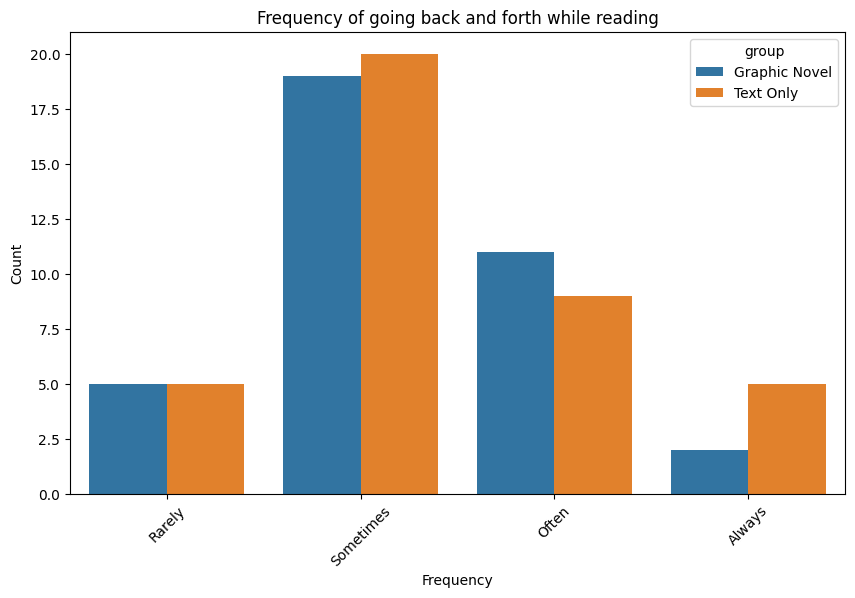

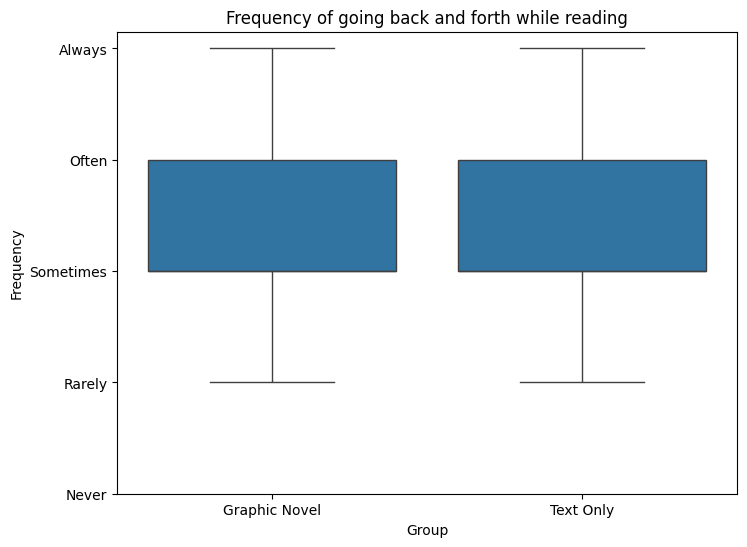

In [1166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add 'group' column to each DataFrame
df_goback_gn_b['group'] = 'Graphic Novel'
df_goback_to_b['group'] = 'Text Only'

# Combine the DataFrames
combined_goback_b = pd.concat([df_goback_gn_b, df_goback_to_b])

# Plot the count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=df_goback_gn_b.columns[0], hue='group', data=combined_goback_b)
plt.title('Frequency of going back and forth while reading')
plt.xlabel('Frequency')
plt.ylabel('Count')

# Customizing x-axis labels
labels = {1:'Never', 2:'Rarely',3: 'Sometimes', 4: 'Often', 5: 'Always'}
ax.set_xticklabels([labels[int(label.get_text())] for label in ax.get_xticklabels()])

plt.xticks(rotation=45)
plt.show()

# Box plot function
def plot_boxplot(df):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='group', y=df.columns[0], data=df)
    plt.title('Frequency of going back and forth while reading')
    plt.xlabel('Group')
    plt.ylabel('Frequency')
    # Customizing y-axis labels
    plt.yticks(ticks=[1, 2, 3, 4, 5], labels=['Never', 'Rarely', 'Sometimes', 'Often', 'Always'])
    plt.show()

# Plot the boxplot
plot_boxplot(combined_goback_b)


In [1167]:
'''
#ALL
#other general comments + intervie
#gn
df_comments_gn = postest_graphicnovel.iloc[:, 44:47]
#to
df_comments_to = postest_textonly.iloc[:, 17:20]
'''
#BALANCED
#gn
df_comments_gn_b = postest_balanced_gn.iloc[:, 44:47]
#to
df_comments_to_b = postest_balanced_to.iloc[:, 17:20]


PUT TOGETHER CLEAN DATA


In [1168]:
'''
#ALL
# Stack preprocessed elements
postest_gn_clean = pd.concat([postest_graphicnovel['Total points'], gn_engagement, df_text_images, df_enjoyment_gn, df_suspect, df_ai, df_change_opinion, change_text_images, change_enjoyment, df_image_comments, df_goback_gn, df_comments_gn], axis=1)
postest_to_clean = pd.concat([postest_textonly['Total points'], to_engagement, df_enjoyment_to,  df_goback_to, df_comments_to], axis=1)
'''
#BALANCED
# Stack preprocessed elements
postest_gn_clean_balanced = pd.concat([postest_balanced_gn['Total points'], gn_engagement_balanced, df_text_images_b, df_enjoyment_gn_balanced, df_suspect_b, df_ai_b, df_change_opinion_b, change_text_images_b, change_enjoyment_b, df_image_comments_b, df_goback_gn_b, df_comments_gn_b], axis=1)
postest_to_clean_balanced = pd.concat([postest_balanced_to['Total points'], to_engagement_balanced, df_enjoyment_to_balanced,  df_goback_to_b, df_comments_to_b], axis=1)


In [1169]:
'''
#ALL
# Save DataFrames to excel file
postest_gn_clean.to_excel('postest_gn_clean.xlsx', index=True)
# Save DataFrames to excel file
postest_to_clean.to_excel('postest_to_clean.xlsx', index=True)
'''
#BALANCED
# Save DataFrames to excel file
postest_gn_clean_balanced.to_excel('postest_gn_clean_40.xlsx', index=True)
# Save DataFrames to excel file
postest_to_clean_balanced.to_excel('postest_to_clean_40.xlsx', index=True)